In [ ]:

import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
transactions_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/transactions_data.csv')
cards_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/cards_data.csv')
users_data = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/users_data.csv')
print(cards_data.head(5))
print(users_data.head(5))
print(transactions_data.head(5))

     id  client_id  card_brand        card_type       card_number  expires  \
0  4524        825        Visa            Debit  4344676511950444  12/2022   
1  2731        825        Visa            Debit  4956965974959986  12/2020   
2  3701        825        Visa            Debit  4582313478255491  02/2024   
3    42        825        Visa           Credit  4879494103069057  08/2024   
4  4659        825  Mastercard  Debit (Prepaid)  5722874738736011  03/2009   

   cvv has_chip  num_cards_issued credit_limit acct_open_date  \
0  623      YES                 2       $24295        09/2002   
1  393      YES                 2       $21968        04/2014   
2  719      YES                 2       $46414        07/2003   
3  693       NO                 1       $12400        01/2003   
4   75      YES                 1          $28        09/2008   

   year_pin_last_changed card_on_dark_web  
0                   2008               No  
1                   2014               No  
2       

In [136]:
#Đọc file json 
with open('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.json') as f:
    mcc_data = json.load(f)
with open('/Users/thekiet/Downloads/Personal_project_data/train_fraud_labels.json') as f:
    frauds_data = json.load(f)

In [137]:
#chuyển file json sang df
mcc_df = pd.DataFrame(list(mcc_data.items()), columns=['MCC_Code', 'Description'])
print(mcc_df.head())
frauds_df = pd.json_normalize(frauds_data).T.reset_index()
frauds_df.columns = ['index', 'target']
frauds_df['index'] = frauds_df['index'].str.replace('target.', '', regex=False)
print(frauds_df.head())

  MCC_Code                           Description
0     5812         Eating Places and Restaurants
1     5541                      Service Stations
2     7996  Amusement Parks, Carnivals, Circuses
3     5411          Grocery Stores, Supermarkets
4     4784                 Tolls and Bridge Fees
      index target
0  10649266     No
1  23410063     No
2   9316588     No
3  12478022     No
4   9558530     No


In [147]:
# Chuyển file json sang csv
mcc_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv', index=False)
mcc_codes = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/mcc_codes.csv')
print(mcc_codes.head())

frauds_df.to_csv('/Users/thekiet/Downloads/Personal_project_data/frauds_df.csv', index=False)
frauds_df = pd.read_csv('/Users/thekiet/Downloads/Personal_project_data/frauds_df.csv')
print(frauds_df.head())

   MCC_Code                           Description
0      5812         Eating Places and Restaurants
1      5541                      Service Stations
2      7996  Amusement Parks, Carnivals, Circuses
3      5411          Grocery Stores, Supermarkets
4      4784                 Tolls and Bridge Fees
      index target
0  10649266     No
1  23410063     No
2   9316588     No
3  12478022     No
4   9558530     No


In [139]:
#Xoá các cột không dùng đến
transactions_data = transactions_data.drop(columns=[
    'merchant_city',
    'merchant_state',
    'zip',
    'use_chip',
    'errors'])
users_data = users_data.drop(columns=[
    'retirement_age',
    'birth_year',
    'birth_month',
    'per_capita_income',
    'address',
    'latitude',
    'longitude',
    'num_credit_cards'])
cards_data = cards_data.drop(columns=[
    'cvv',
    'expires',
    'card_number',
    'card_brand',
    'year_pin_last_changed',
    'card_on_dark_web',
    'num_cards_issued',
    'acct_open_date'])

#Check lại các dataframe
print(transactions_data.head(5))
print(users_data.head(5))
print(cards_data.head(5))

        id                 date  client_id  card_id   amount  merchant_id  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00        59935   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57        67570   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00        27092   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00        27092   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41        13051   

    mcc  
0  5499  
1  5311  
2  4829  
3  4829  
4  5813  
     id  current_age  gender yearly_income total_debt  credit_score
0   825           53  Female        $59696    $127613           787
1  1746           53  Female        $77254    $191349           701
2  1718           81  Female        $33483       $196           698
3   708           63  Female       $249925    $202328           722
4  1164           43    Male       $109687    $183855           675
     id  client_id        card_type has_chip credit_limit
0  4524    

In [140]:
#Kiểm tra NA 
print(transactions_data.isna().sum())
print(users_data.isna().sum())
print(cards_data.isna().sum())
print(mcc_codes.isna().sum())
print(frauds_df.isna().sum())


id             0
date           0
client_id      0
card_id        0
amount         0
merchant_id    0
mcc            0
dtype: int64
id               0
current_age      0
gender           0
yearly_income    0
total_debt       0
credit_score     0
dtype: int64
id              0
client_id       0
card_type       0
has_chip        0
credit_limit    0
dtype: int64
index     0
target    0
dtype: int64
index     0
target    0
dtype: int64


In [141]:
# Chuyển đổi kiểu dữ liệu
frauds_df['index'] = frauds_df['index'].astype(str)
transactions_data['id'] = transactions_data['id'].astype(str)

# Tìm các giao dịch có gian lận để loại bỏ trước khi sử dụng data
non_no_frauds = frauds_df[frauds_df['target'] != 'No']

# Lọc transactions lừa đảo
if len(non_no_frauds) > 0:
    clean_transactions = transactions_data[~transactions_data['id'].isin(non_no_frauds['index'])]
    print(f"Đã loại bỏ {len(transactions_data) - len(clean_transactions)} giao dịch lừa đảo")
else:
    clean_transactions = transactions_data.copy()
    print("Không có giao dịch lừa đảo")

Đã loại bỏ 13332 giao dịch lừa đảo


In [142]:
# Chuẩn hoá kiểu dữ liệu cho ngày tháng, giá trị giao dịch, thu nhập năm, tổng nợ, hạn mức tín dụng
clean_transactions['date'] = pd.to_datetime(clean_transactions['date'])
      # convert to datetime
clean_transactions['amount'] = (
    clean_transactions['amount']
    .str.replace('$', '', regex=False)  # Xóa ký hiệu $
    .str.replace(',', '', regex=False)   # Xóa dấu phân cách nghìn (nếu có)
    .apply(pd.to_numeric)
)

users_data['yearly_income'] = (
    users_data['yearly_income']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip() 
    .apply(pd.to_numeric)
)

users_data['total_debt'] = (
    users_data['total_debt']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip() 
    .apply(pd.to_numeric)
)

cards_data['credit_limit'] = (
    cards_data['credit_limit']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .apply(pd.to_numeric)
)

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/4245443956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['date'] = pd.to_datetime(clean_transactions['date'])
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/4245443956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['amount'] = (


In [143]:
#Kiểm tra tổng số mặt hàng đã được giao dịch 
unique_descriptions = mcc_df['Description'].unique()
print(unique_descriptions)
print(f"Tổng số giá trị unique: {len(unique_descriptions)}")

['Eating Places and Restaurants' 'Service Stations'
 'Amusement Parks, Carnivals, Circuses' 'Grocery Stores, Supermarkets'
 'Tolls and Bridge Fees' 'Utilities - Electric, Gas, Water, Sanitary'
 'Book Stores' 'Fast Food Restaurants' 'Money Transfer'
 'Department Stores' 'Lumber and Building Materials' 'Discount Stores'
 'Computer Network Services' 'Miscellaneous Food Stores'
 'Taxicabs and Limousines' 'Wholesale Clubs'
 'Miscellaneous Home Furnishing Stores' 'Motion Picture Theaters'
 'Drinking Places (Alcoholic Beverages)' 'Telecommunication Services'
 'Shoe Stores' 'Cosmetic Stores' 'Medical Services'
 'Automotive Service Shops' 'Drug Stores and Pharmacies'
 'Local and Suburban Commuter Transportation'
 'Digital Goods - Media, Books, Apps' 'Dentists and Orthodontists'
 'Package Stores, Beer, Wine, Liquor'
 'Sports Apparel, Riding Apparel Stores' 'Beauty and Barber Shops'
 'Miscellaneous Metalwork' 'Theatrical Producers' 'Passenger Railways'
 'Family Clothing Stores'
 'Cable, Satellite

In [148]:
# Tạo map gán tên ngành hàng vào mỗi giao dịch nhằm phân loại giao dịch theo ngành hàng
mcc_map = dict(zip(mcc_codes['MCC_Code'].astype(str), mcc_codes['Description'])) # tạo từ điển đối chiếu mã -> tên
clean_transactions['mcc'] = clean_transactions['mcc'].astype(str) #chuyển đổi mã mcc là text
clean_transactions['Description'] = clean_transactions['mcc'].map(mcc_map) 

# Tạo nhóm category lớn, loại outliner category 
def categorize_into_groups(description):
    if pd.isna(description):
        return 'Other'
    
    description_lower = description.lower()
    
    # 1. Ăn uống & Nhà hàng
    if any(keyword in description_lower for keyword in ['restaurant', 'eating', 'food', 'fast food', 'drinking', 'bar', 'cafe']):
        return 'Food & Dining'
    
    # 2. Mua sắm & Bán lẻ
    elif any(keyword in description_lower for keyword in ['store', 'shop', 'department', 'discount', 'wholesale', 'retail', 'clothing', 'shoe', 'cosmetic', 'furniture', 'electronics', 'hardware', 'sporting', 'appliance', 'gift', 'music', 'book', 'florist']):
        return 'Shopping & Retail'
    
    # 3. Dịch vụ cá nhân & Sức khỏe
    elif any(keyword in description_lower for keyword in ['medical', 'doctor', 'dentist', 'hospital', 'chiropractor', 'podiatrist', 'beauty', 'barber', 'laundry', 'cleaning', 'legal', 'insurance', 'accounting', 'tax']):
        return 'Personal Services & Healthcare'
    
    # 4. Du lịch & Giải trí
    elif any(keyword in description_lower for keyword in ['travel', 'hotel', 'motel', 'resort', 'lodging', 'airline', 'cruise', 'railroad', 'railway', 'bus', 'transportation', 'amusement', 'park', 'theater', 'sports', 'recreational', 'betting', 'casino']):
        return 'Travel & Entertainment'
    
    # 5. Xăng dầu & Di chuyển
    elif any(keyword in description_lower for keyword in ['service station', 'gas', 'fuel', 'toll', 'bridge', 'trucking', 'freight', 'towing', 'automotive', 'car wash']):
        return 'Fuel & Transportation'
    
    # 6. Tiện ích & Dịch vụ gia đình
    elif any(keyword in description_lower for keyword in ['utility', 'electric', 'gas', 'water', 'sanitary', 'telecommunication', 'cable', 'satellite', 'tv', 'heating', 'plumbing', 'air conditioning']):
        return 'Utilities & Home Services'
    
    # 7. Mặt hàng công nghệ
    elif any(keyword in description_lower for keyword in ['computer', 'network', 'digital', 'electronic', 'semiconductor', 'software', 'app', 'game']):
        return 'Technology & Digital Goods'
    
    # 8. Vật liệu & Xây dựng
    elif any(keyword in description_lower for keyword in ['lumber', 'building', 'material', 'metal', 'steel', 'iron', 'welding', 'fabrication', 'machinery', 'industrial', 'tool']):
        return 'Construction & Industrial'
    
    # 9. Dịch vụ tài chính
    elif any(keyword in description_lower for keyword in ['money transfer', 'bank', 'financial', 'payment']):
        return 'Financial Services'
    
    # 10. Khác
    else:
        return 'Other'

# Áp dụng phân loại mới cho các mặt hàng 
clean_transactions['category_group'] = clean_transactions['Description'].apply(categorize_into_groups)

print("Số lượng các mặt hàng theo phân loại mới:")
print(clean_transactions['category_group'].value_counts())



/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3803892929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['mcc'] = clean_transactions['mcc'].astype(str) #chuyển đổi mã mcc là text
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3803892929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['Description'] = clean_transactions['mcc'].map(mcc_map)
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3803892929.py:54: SettingW

Số lượng các mặt hàng theo phân loại mới:
category_group
Shopping & Retail                 4949374
Food & Dining                     3326248
Fuel & Transportation             2481419
Personal Services & Healthcare     741203
Financial Services                 588415
Travel & Entertainment             405199
Utilities & Home Services          284261
Construction & Industrial          268710
Other                              212377
Technology & Digital Goods          35377
Name: count, dtype: int64


In [ ]:
#Tạo cột năm quan sát thay đổi
clean_transactions['year'] = clean_transactions['date'].dt.year

#Tạo cột tổng chi tiêu, loại ra các giao dịch tiền vào:
clean_transactions['spend'] = 0
clean_transactions['is_spend'] = clean_transactions['amount'] < 0

# Chỉ gán giá trị cho những dòng là chi tiêu
clean_transactions.loc[clean_transactions['is_spend'], 'spend'] = clean_transactions['amount'].abs()

# Kiểm tra lại độ dài dữ liệu chi tiêu 
len(clean_transactions['is_spend'])

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3983424135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['year'] = clean_transactions['date'].dt.year
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3983424135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_transactions['spend'] = 0
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3983424135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

13292583

In [155]:
# Nhóm dữ liệu, mỗi khách hàng mỗi năm chi bao nhiêu, giao dịch bao nhiêu lần

agg_client_year = clean_transactions.groupby(['client_id', 'year']).agg(
    total_spent=('spend', 'sum'),  # tính tổng chi tiêu
    total_transactions=('id', 'count'),  # số lượng giao dịch
    group_spent=('spend', 'sum')
).reset_index()

#Chia tổng chi tiêu thành nhóm, chủ yếu (0-10k)
spent_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000, 20000, float('inf')]
labels = ['0-500', '500-1,000', '1,000-1,500', '1,500-2,000', '2,000-2,500', '2,500-3,000', '3,000-5,000', '5,000-10,000', '10,000-20,000', '20,000+']
agg_client_year['group_spent'] = pd.cut(
    agg_client_year['group_spent'], 
    bins=spent_bins, 
    labels=labels, 
    right=False
)

In [156]:
# Tìm xem mỗi khách hàng chi nhiều tiền nhất cho ngành hàng nào
cat_sum = (
    clean_transactions[clean_transactions['is_spend']]  # Chỉ lấy giao dịch chi tiêu
    .groupby(['client_id', 'year', 'category_group'])  # Nhóm theo khách hàng, năm, nhóm ngành hàng
    .agg(category_spend=('spend', 'sum'))  # Tính tổng chi cho mỗi ngành
    .reset_index()
)

# Sắp xếp để tìm nhóm ngành hàng chi nhiều nhất
cat_sum = cat_sum.sort_values(['client_id', 'year', 'category_spend'], ascending=[True, True, False])

# Lấy nhóm ngành hàng chi nhiều nhất của mỗi khách hàng
top_cat = cat_sum.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'category_group']]
top_cat = top_cat.rename(columns={'category_group': 'top_category'})

In [157]:
# Tìm xem khách hàng dùng loại thẻ nào nhiều nhất (credit/debit)
type_cards = clean_transactions.merge(cards_data[['id', 'card_type', 'credit_limit']], left_on='card_id', right_on='id', how='left')

card_group = (
    type_cards[type_cards['is_spend']]  # Chỉ xét chi tiêu
    .groupby(['client_id', 'year', 'card_type'])  # Nhóm theo khách hàng, năm, loại thẻ
    .agg(card_spend=('spend', 'sum'))  # Tổng chi tiêu bằng mỗi loại thẻ
    .reset_index()
)

# Sắp xếp để tìm thẻ được dùng nhiều nhất
card_group = card_group.sort_values(['client_id', 'year', 'card_spend'], ascending=[True, True, False])

# Lấy thẻ chính của mỗi khách hàng
primary_card = card_group.groupby(['client_id', 'year']).first().reset_index()[['client_id', 'year', 'card_type']]

# Lấy credit_limit trung bình cho mỗi client 
client_credit_limit = type_cards.groupby('client_id')['credit_limit'].mean().reset_index()
print(client_credit_limit)

# Lấy tổng nợ khách hàng
client_total_debt = users_data[['id', 'total_debt']].rename(columns={'id': 'client_id'})
print(client_total_debt.head())

      client_id  credit_limit
0             0  25083.157401
1             1  14115.855865
2             2  10130.618531
3             3   2247.864472
4             4  24195.655730
...         ...           ...
1214       1994  14967.462924
1215       1995   7976.274268
1216       1996  12577.143462
1217       1997  22767.742236
1218       1998    139.469624

[1219 rows x 2 columns]
   client_id  total_debt
0        825      127613
1       1746      191349
2       1718         196
3        708      202328
4       1164      183855


In [158]:
# Kết hợp tất cả thông tin thành 1 bảng duy nhất
client_df = (
    agg_client_year  # Tổng chi tiêu
    .merge(top_cat, on=['client_id', 'year'], how='left')  # Thêm ngành hàng yêu thích
    .merge(primary_card, on=['client_id', 'year'], how='left')  # Thêm loại thẻ chính
    .merge(
        users_data[['id', 'gender', 'yearly_income', 'credit_score', 'current_age']]
        .rename(columns={'id': 'client_id'}),
        on='client_id',
        how='left'
    )
    .merge(client_credit_limit, on='client_id', how='left')  
    .merge(client_total_debt, on='client_id', how='left')
)
print(client_df.head())

   client_id  year  total_spent  total_transactions    group_spent  \
0          0  2010       5703.0                1113   5,000-10,000   
1          0  2011      10174.0                1330  10,000-20,000   
2          0  2012       6549.0                1312   5,000-10,000   
3          0  2013       7019.0                1290   5,000-10,000   
4          0  2014       7942.0                1387   5,000-10,000   

            top_category card_type gender  yearly_income  credit_score  \
0          Food & Dining    Credit   Male          59613           763   
1  Fuel & Transportation    Credit   Male          59613           763   
2  Fuel & Transportation    Credit   Male          59613           763   
3          Food & Dining    Credit   Male          59613           763   
4  Fuel & Transportation     Debit   Male          59613           763   

   current_age  credit_limit  total_debt  
0           33  25083.157401       36199  
1           33  25083.157401       36199  
2    

In [ ]:
# Phân tuổi khách hàng thành các nhóm
age_bins = [0, 24, 34, 44, 54, 64, 190]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
client_df['age_group'] = pd.cut(client_df['current_age'], bins=age_bins, labels=labels, right=True)

# Phân nhóm thu nhập    
income_bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = [
    '<25000', 
    '25000–50000', 
    '50000–75000', 
    '75000–100000', 
    '100000–150000', 
    '150000+'
]
client_df['group_income'] = pd.cut(client_df['yearly_income'], bins=income_bins, labels=income_labels, right=False)

# Chọn các cột quan trọng cho phân tích
final_client_df = client_df[[
    'client_id', 'gender', 'age_group', 'yearly_income', 'credit_score', 'credit_limit', 'group_income', 'total_debt',
    'card_type', 'total_spent', 'total_transactions', 'year', 'top_category', 'group_spent'
]]
print(final_client_df.head())

   client_id gender age_group  yearly_income  credit_score  credit_limit  \
0          0   Male     25-34          59613           763  25083.157401   
1          0   Male     25-34          59613           763  25083.157401   
2          0   Male     25-34          59613           763  25083.157401   
3          0   Male     25-34          59613           763  25083.157401   
4          0   Male     25-34          59613           763  25083.157401   

  group_income  total_debt card_type  total_spent  total_transactions  year  \
0  50000–75000       36199    Credit       5703.0                1113  2010   
1  50000–75000       36199    Credit      10174.0                1330  2011   
2  50000–75000       36199    Credit       6549.0                1312  2012   
3  50000–75000       36199    Credit       7019.0                1290  2013   
4  50000–75000       36199     Debit       7942.0                1387  2014   

            top_category    group_spent  
0          Food & Dining  

In [ ]:
print(client_df)

       client_id  year  total_spent  total_transactions    group_spent  \
0              0  2010       5703.0                1113   5,000-10,000   
1              0  2011      10174.0                1330  10,000-20,000   
2              0  2012       6549.0                1312   5,000-10,000   
3              0  2013       7019.0                1290   5,000-10,000   
4              0  2014       7942.0                1387   5,000-10,000   
...          ...   ...          ...                 ...            ...   
11898       1998  2015       1454.0                 397    1,000-1,500   
11899       1998  2016       1464.0                 389    1,000-1,500   
11900       1998  2017       3219.0                 385    3,000-5,000   
11901       1998  2018       2166.0                 389    2,000-2,500   
11902       1998  2019       1849.0                 380    1,500-2,000   

                top_category        card_type gender  yearly_income  \
0              Food & Dining           C

In [160]:
# Chia dữ liệu thành 2 bảng tránh trùng lặp khi vẽ biểu đồ quan hệ các biến
# Kiểm tra phân loại biến static(giống nhau qua các năm), dynamic(có sự khác biệt qua các năm)

columns_to_check = [col for col in final_client_df.columns if col not in ['client_id', 'year']]
static_columns = []
dynamic_columns = []

for column in columns_to_check:
    unique_counts = final_client_df.groupby('client_id')[column].nunique()
    if (unique_counts == 1).all():
        static_columns.append(column)
        print(f"✓ {column}: STATIC")
    else:
        dynamic_columns.append(column)
        print(f"✗ {column}: DYNAMIC")

#Kiểm tra phân loại biến
print(f"Biến ở bảng static: {static_columns}")
print(f"Biến ở bảng dynamic: {dynamic_columns}")

# Chia biến vào 2 bảng dữ liệu tránh trùng lặp dữ liệu khi vẽ biểu đồ quan hệ
client_static_info = final_client_df[['client_id'] + static_columns].drop_duplicates()
client_dynamic_info = final_client_df[['client_id', 'year'] + dynamic_columns]

# Kiểm tra độ dài dữ liệu sau khi chia bảng
print(f"Bảng static info: {client_static_info.shape}")
print(f"Bảng dynamic info: {client_dynamic_info.shape}")
print(f"Số khách hàng unique - Static: {client_static_info['client_id'].nunique()}")
print(f"Số khách hàng unique - Dynamic: {client_dynamic_info['client_id'].nunique()}")

✓ gender: STATIC
✓ age_group: STATIC
✓ yearly_income: STATIC
✓ credit_score: STATIC
✓ credit_limit: STATIC
✓ group_income: STATIC
✓ total_debt: STATIC
✗ card_type: DYNAMIC
✗ total_spent: DYNAMIC
✗ total_transactions: DYNAMIC
✗ top_category: DYNAMIC
✗ group_spent: DYNAMIC
Biến ở bảng static: ['gender', 'age_group', 'yearly_income', 'credit_score', 'credit_limit', 'group_income', 'total_debt']
Biến ở bảng dynamic: ['card_type', 'total_spent', 'total_transactions', 'top_category', 'group_spent']
Bảng static info: (1219, 8)
Bảng dynamic info: (11903, 7)
Số khách hàng unique - Static: 1219
Số khách hàng unique - Dynamic: 1219


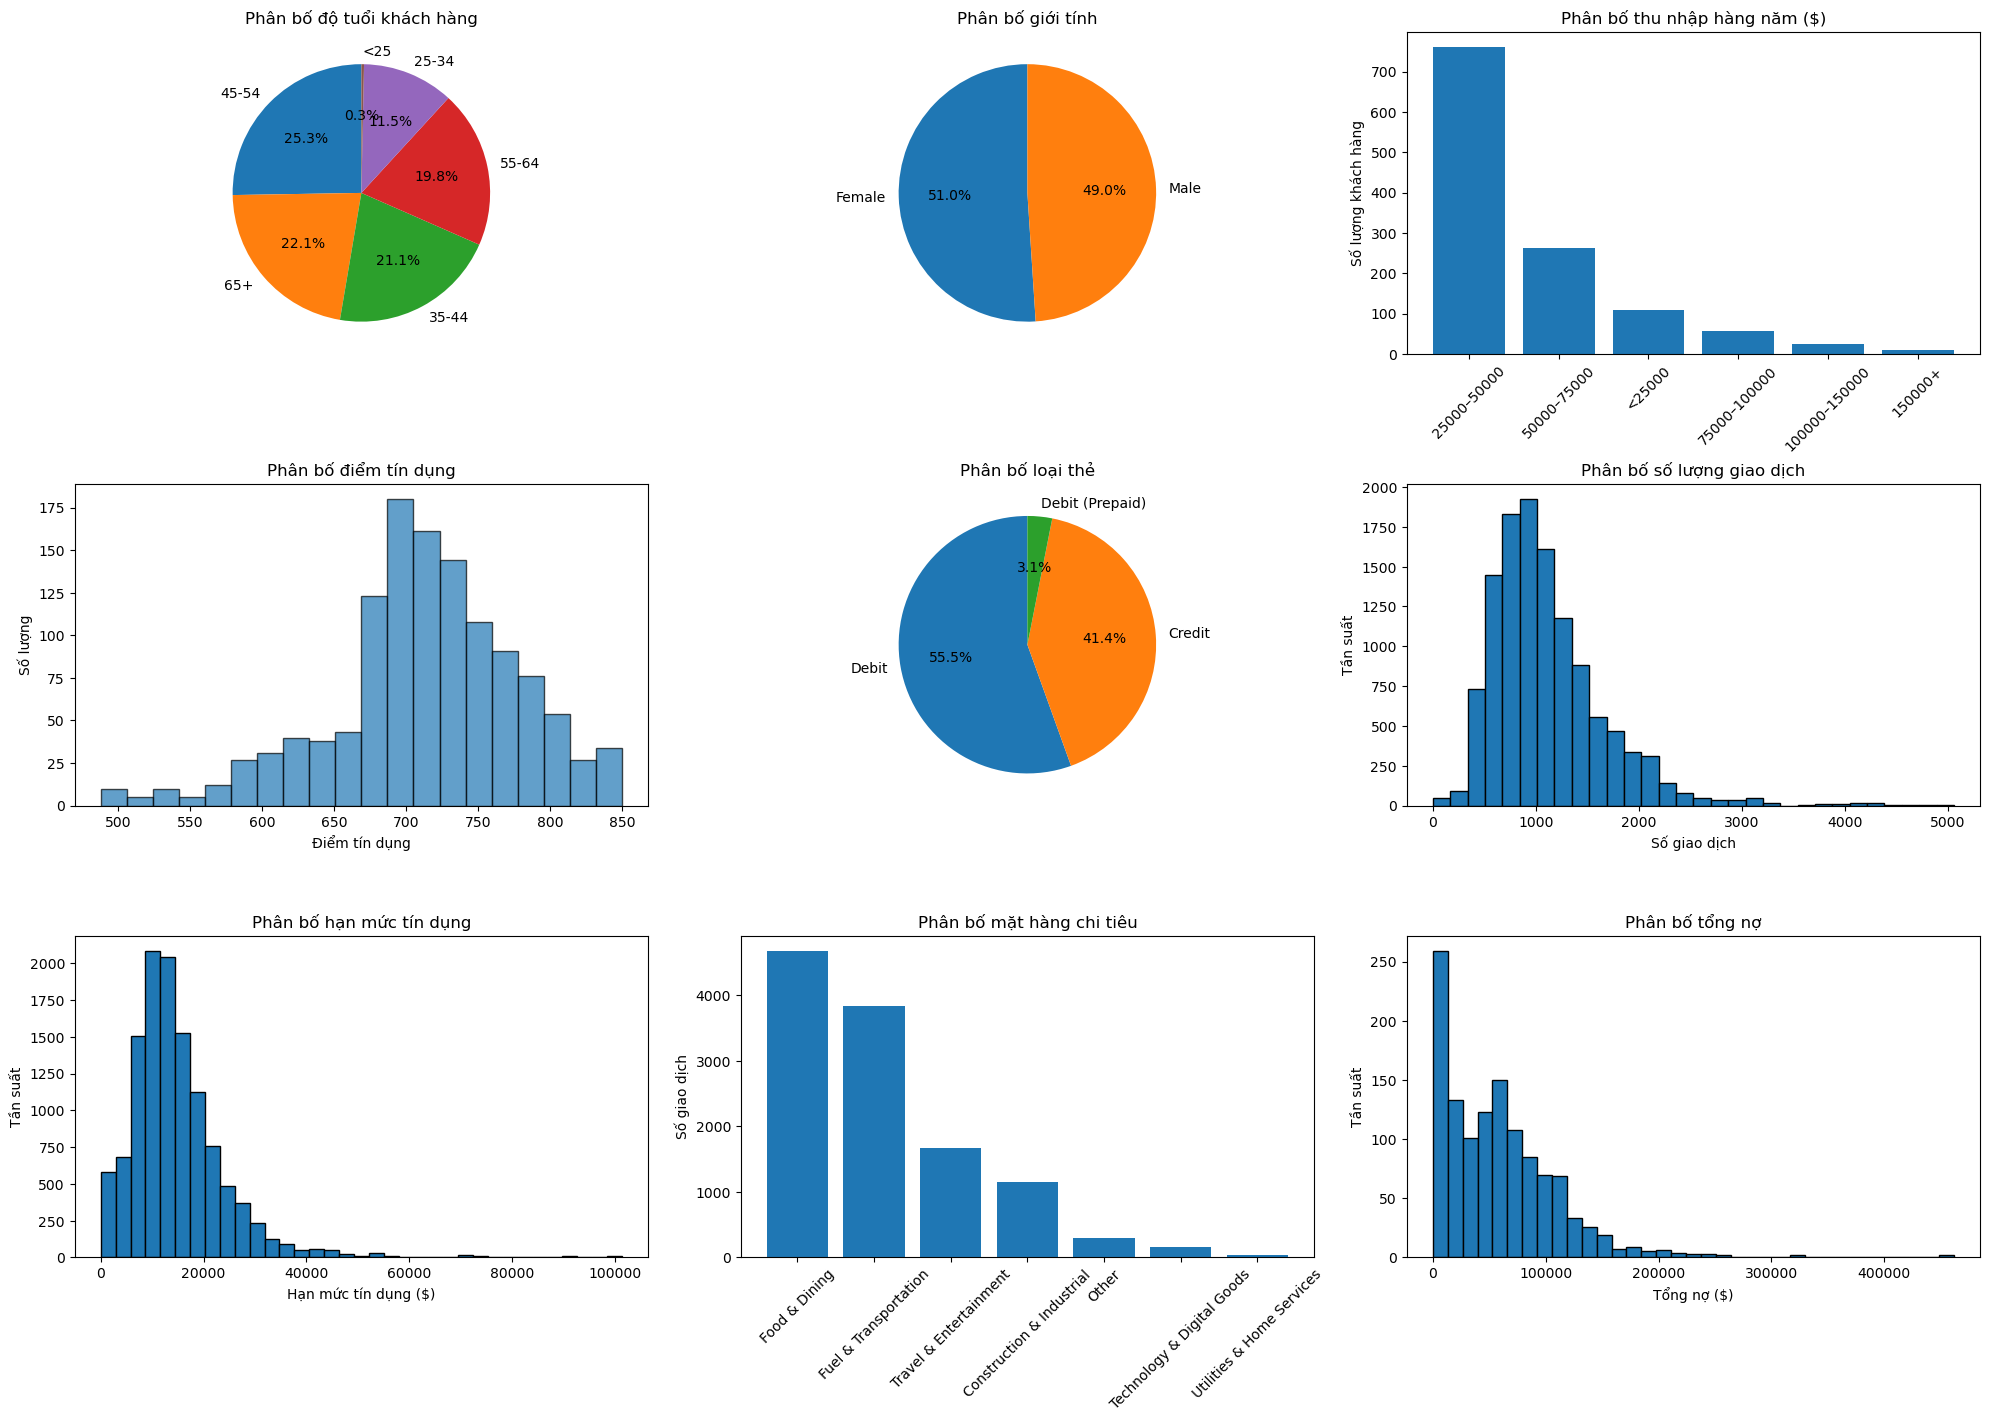

In [162]:
# EDA tổng quan 
# Phân bố các biến trong toàn bộ khung thời gian (9 năm)
plt.figure(figsize=(20, 15))

# Phân bố độ tuổi - dùng client_static_info
plt.subplot(3, 3, 1)
age_dist = client_static_info['age_group'].value_counts()
plt.pie(age_dist.values, labels=age_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố độ tuổi khách hàng')

# Phân bố giới tính - dùng client_static_info
plt.subplot(3, 3, 2)
gender_dist = client_static_info['gender'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố giới tính')

# Phân bố thu nhập - dùng client_static_info
plt.subplot(3, 3, 3)
income_dist = client_static_info['group_income'].value_counts()
plt.bar(range(len(income_dist)), income_dist.values)
plt.title('Phân bố thu nhập hàng năm ($)')
plt.xticks(range(len(income_dist)), income_dist.index, rotation=45)
plt.ylabel('Số lượng khách hàng')

# Phân bố điểm tín dụng - dùng client_static_info
plt.subplot(3, 3, 4)
plt.hist(client_static_info['credit_score'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Phân bố điểm tín dụng')
plt.xlabel('Điểm tín dụng')
plt.ylabel('Số lượng')

# Phân bố loại thẻ tất cả khách hàng dùng trong 9 năm 
plt.subplot(3, 3, 5)
card_dist = final_client_df['card_type'].value_counts()
plt.pie(card_dist.values, labels=card_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân bố loại thẻ')

# Tần suất thực hiện giao dịch của các khách hàng mỗi năm trong giai đoạn 2010-2019 - dùng final_client_df
plt.subplot(3, 3, 6)
plt.hist(final_client_df['total_transactions'], bins=30, edgecolor='black')
plt.title('Phân bố số lượng giao dịch')
plt.xlabel('Số giao dịch')
plt.ylabel('Tần suất')

#Phân bố hạn mức tín dụng các khách hàng mỗi năm trong giai đoạn 2010-2019
plt.subplot(3, 3, 7)
plt.hist(final_client_df['credit_limit'], bins=35, edgecolor='black')
plt.title('Phân bố hạn mức tín dụng')
plt.xlabel('Hạn mức tín dụng ($)')
plt.ylabel('Tần suất')

#Phân bố hạn mặt hàng chi tiêu các khách hàng mỗi năm trong giai đoạn 2010-2019
plt.subplot(3, 3, 8)
category_counts = client_dynamic_info['top_category'].value_counts()
plt.bar(range(len(category_counts)), category_counts.values)
plt.title('Phân bố mặt hàng chi tiêu')
plt.xticks(range(len(category_counts)), category_counts.index, rotation=45)
plt.ylabel('Số giao dịch')

# Phân bố tổng nợ - dùng client_static_info
plt.subplot(3, 3, 9)
plt.hist(client_static_info['total_debt'], bins=35, edgecolor='black')
plt.title('Phân bố tổng nợ')
plt.xlabel('Tổng nợ ($)')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

<Figure size 1200x600 with 0 Axes>

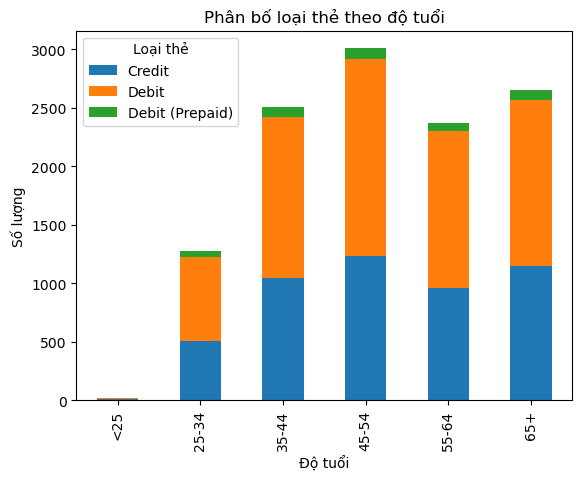

In [ ]:
# 3. Phân bố loại thẻ theo độ tuổi
plt.figure(figsize=(12, 6))
card_age = pd.crosstab(final_client_df['age_group'], final_client_df['card_type'])
card_age.plot(kind='bar', stacked=True)
plt.title('Phân bố loại thẻ theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Số lượng')
plt.legend(title='Loại thẻ')
plt.show()


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/625299890.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/625299890.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_income = final_client_df.groupby(['card_type', 'age_group'])['yearly_income'].mean().unstack()


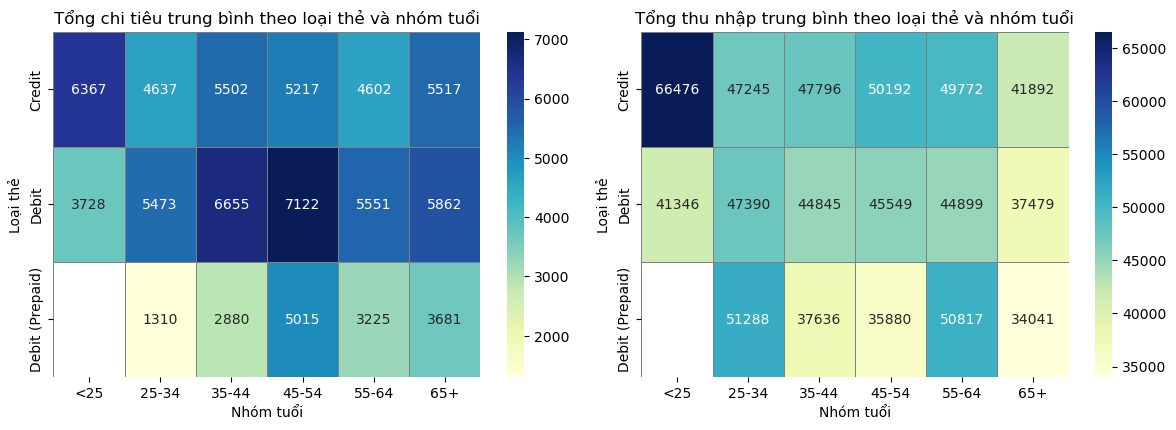

In [ ]:
plt.figure(figsize=(12, 8))

#Heatmap mối quan hệ chi tiêu trung bình theo loại thẻ và nhóm tuổi
plt.subplot(2, 2, 1)
card_spent = final_client_df.groupby(['card_type', 'age_group'])['total_spent'].mean().unstack()
sns.heatmap(card_spent, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng chi tiêu trung bình theo loại thẻ và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Loại thẻ')
#plt.tight_layout()
#plt.show()

#Heatmap mối quan hệ thu nhập trung bình theo loại thẻ và nhóm tuổi
plt.subplot(2, 2, 2)
card_income = final_client_df.groupby(['card_type', 'age_group'])['yearly_income'].mean().unstack()
sns.heatmap(card_income, annot=True, fmt='.0f',cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray')
plt.title('Tổng thu nhập trung bình theo loại thẻ và nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Loại thẻ')

plt.tight_layout()
plt.show()

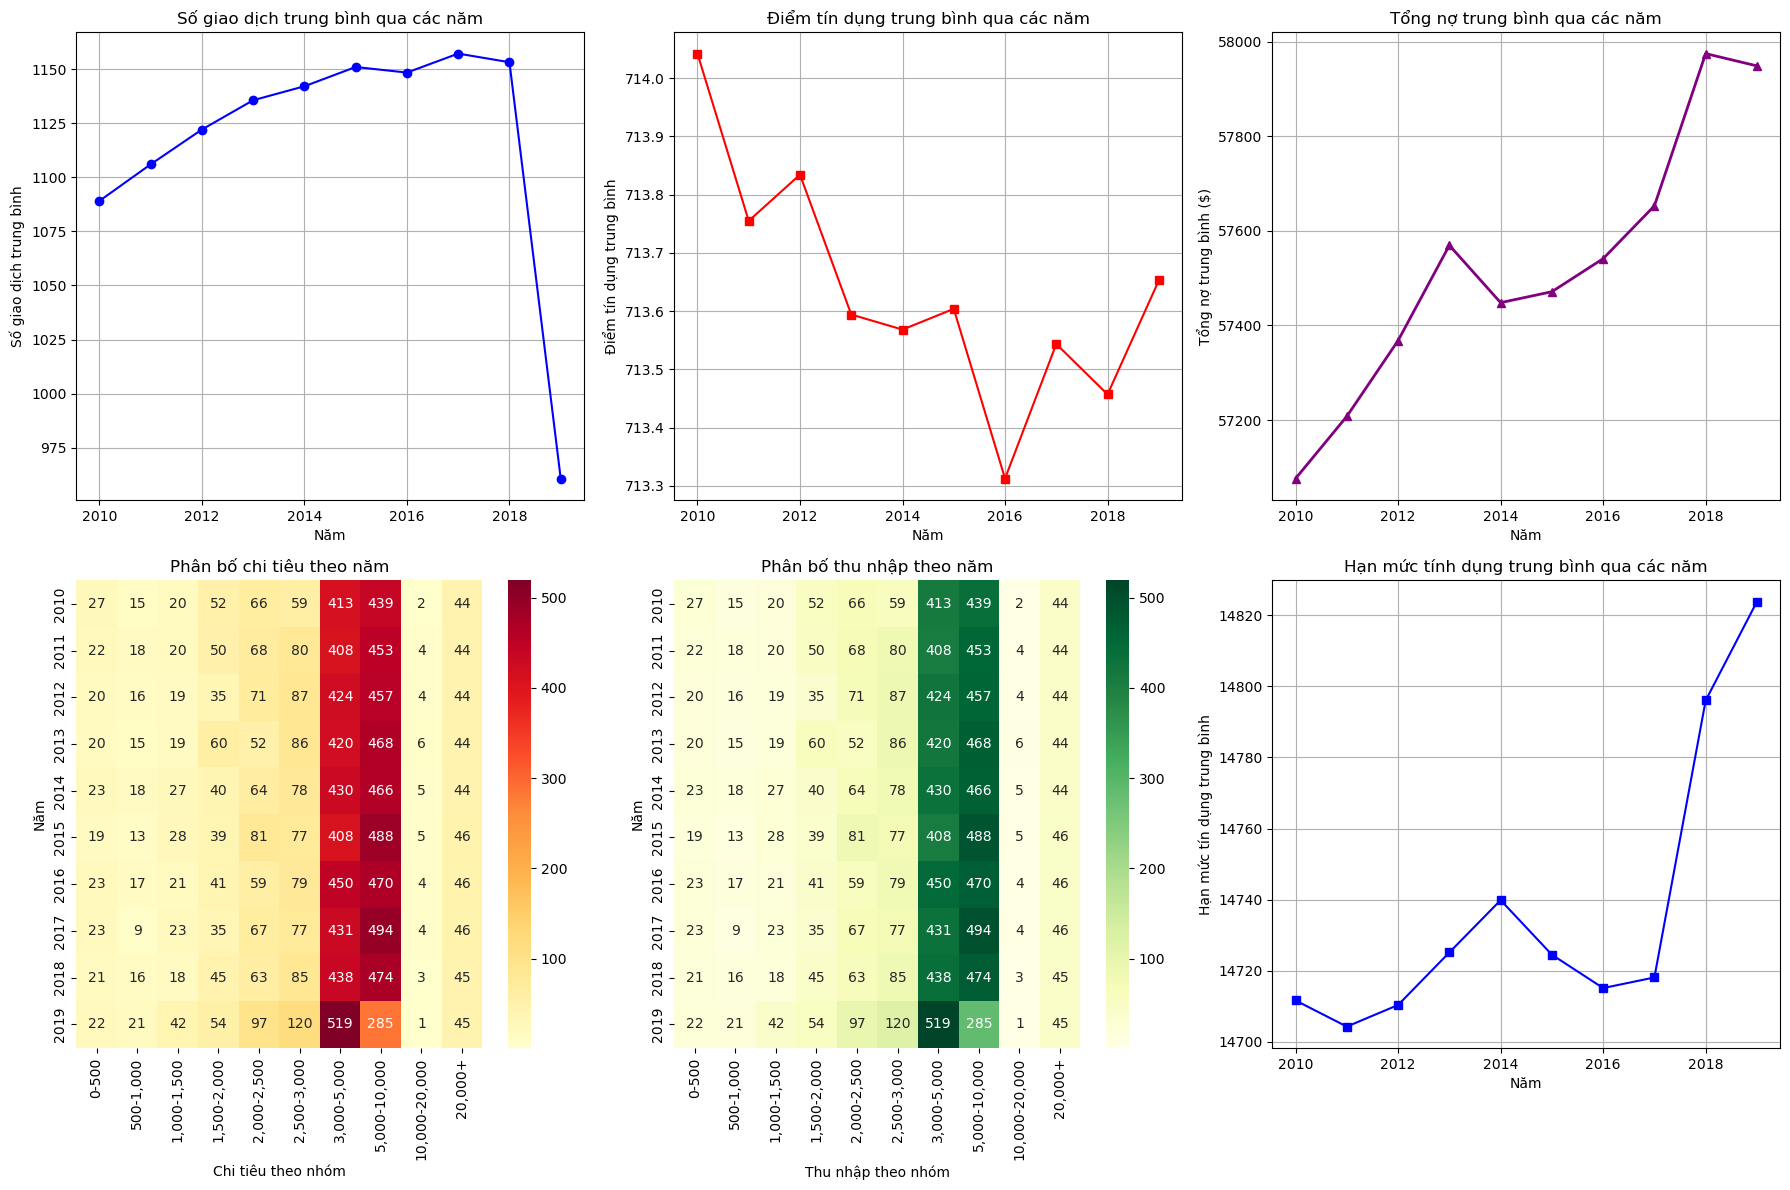

In [ ]:
plt.figure(figsize=(18, 12))

# Số giao dịch trung bình theo năm 
plt.subplot(2, 3, 1)
yearly_transactions = client_dynamic_info.groupby('year')['total_transactions'].mean()
plt.plot(yearly_transactions.index, yearly_transactions.values, marker='o', color='blue')
plt.title('Số giao dịch trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số giao dịch trung bình')
plt.grid(True)


# Điểm tín dụng trung bình theo năm
yearly_credit_merged = final_client_df.groupby('year')['credit_score'].mean()
plt.subplot(2, 3, 2)
plt.plot(yearly_credit_merged.index, yearly_credit_merged.values, marker='s', color='red')
plt.title('Điểm tín dụng trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Điểm tín dụng trung bình')
plt.grid(True)

# Tổng nợ trung bình theo năm 
plt.subplot(2, 3, 3)
yearly_total_debt = final_client_df.groupby('year')['total_debt'].mean()
plt.plot(yearly_total_debt.index, yearly_total_debt.values, marker='^', color='purple', linewidth=2)
plt.title('Tổng nợ trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Tổng nợ trung bình ($)')
plt.grid(True)

# Phân bố chi tiêu theo năm 
plt.subplot(2, 3, 4)
yearly_group_spent = pd.crosstab(client_dynamic_info['year'], client_dynamic_info['group_spent'])
sns.heatmap(yearly_group_spent, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Phân bố chi tiêu theo năm')
plt.xlabel('Chi tiêu theo nhóm')
plt.ylabel('Năm')

# Phân bố thu nhập theo năm 
plt.subplot(2, 3, 5)
yearly_group_income = pd.crosstab(client_dynamic_info['year'], client_static_info['group_income'])
sns.heatmap(yearly_group_spent, annot=True, cmap='YlGn', fmt='d')
plt.title('Phân bố thu nhập theo năm')
plt.xlabel('Thu nhập theo nhóm')
plt.ylabel('Năm')

# Xu hướng hạn mức tín dụng theo năm
yearly_credit_limit = final_client_df.groupby('year')['credit_limit'].mean()
plt.subplot(2, 3, 6)
plt.plot(yearly_credit_limit.index, yearly_credit_limit.values, marker='s', color='blue')
plt.title('Hạn mức tính dụng trung bình qua các năm')
plt.xlabel('Năm')
plt.ylabel('Hạn mức tín dụng trung bình')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#_____Hết_EDA_________

/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/605419507.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_limit_all = final_client_df.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/605419507.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_credit_limit_only = credit_card_users.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()


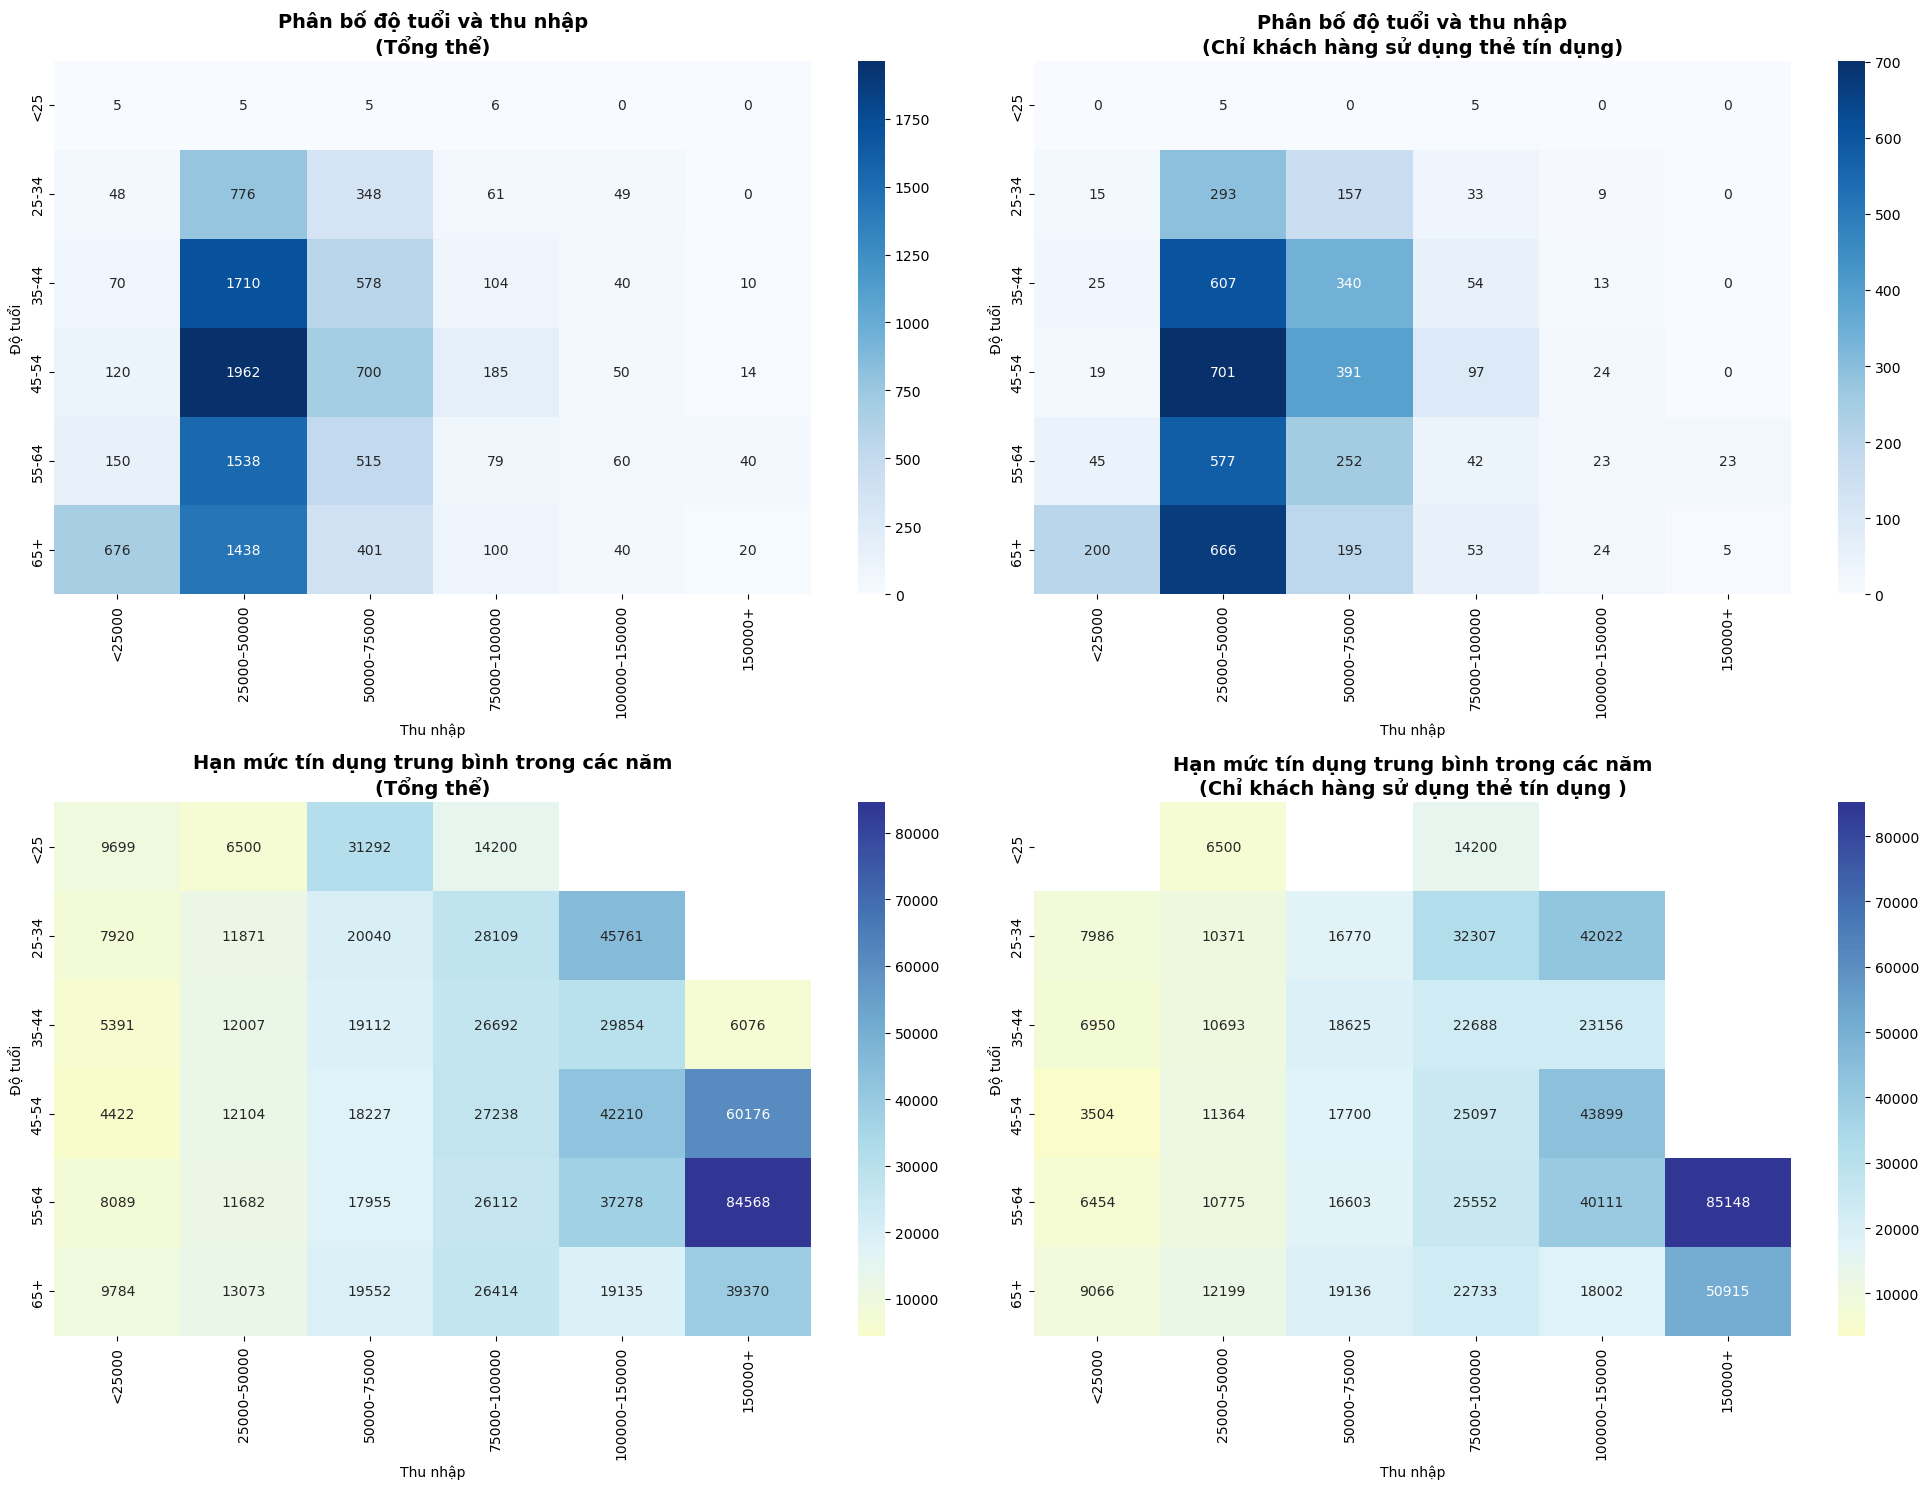

In [165]:
# Tạo dataset cho credit card users
credit_card_users = final_client_df[final_client_df['card_type'] == 'Credit']

# Tạo heatmap
plt.figure(figsize=(20, 15))
# 1. SO SÁNH PHÂN BỐ ĐỘ TUỔI VS THU NHẬP, XEM SỰ KHÁC NHAU CỦA NHÂN KHẨU HỌC

# Tổng thể
plt.subplot(2, 2, 1)
age_income_all = pd.crosstab(final_client_df['age_group'], final_client_df['group_income'])
sns.heatmap(age_income_all, annot=True, cmap='Blues', fmt='d')
plt.title('Phân bố độ tuổi và thu nhập\n(Tổng thể)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(2, 2, 2)
age_income_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['group_income'])
sns.heatmap(age_income_credit, annot=True, cmap='Blues', fmt='d')
plt.title('Phân bố độ tuổi và thu nhập\n(Chỉ khách hàng sử dụng thẻ tín dụng)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# 2. SO SÁNH ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI VÀ THU NHẬP

# Tổng thể
plt.subplot(2, 2, 3)
age_income_credit_limit_all = final_client_df.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
sns.heatmap(age_income_credit_limit_all, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('Hạn mức tín dụng trung bình trong các năm\n(Tổng thể)', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

# Chỉ credit card users
plt.subplot(2, 2, 4)
age_income_credit_limit_only = credit_card_users.groupby(['age_group', 'group_income'])['credit_limit'].mean().unstack()
sns.heatmap(age_income_credit_limit_only, annot=True, cmap='RdYlBu', fmt='.0f', center=700)
plt.title('Hạn mức tín dụng trung bình trong các năm\n(Chỉ khách hàng sử dụng thẻ tín dụng )', fontsize=14, fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Độ tuổi')

plt.tight_layout()
plt.show()



/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3917207238.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spent_all = final_client_df.groupby('age_group')['total_spent'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3917207238.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spent_credit = credit_card_users.groupby('age_group')['total_spent'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3917207238.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

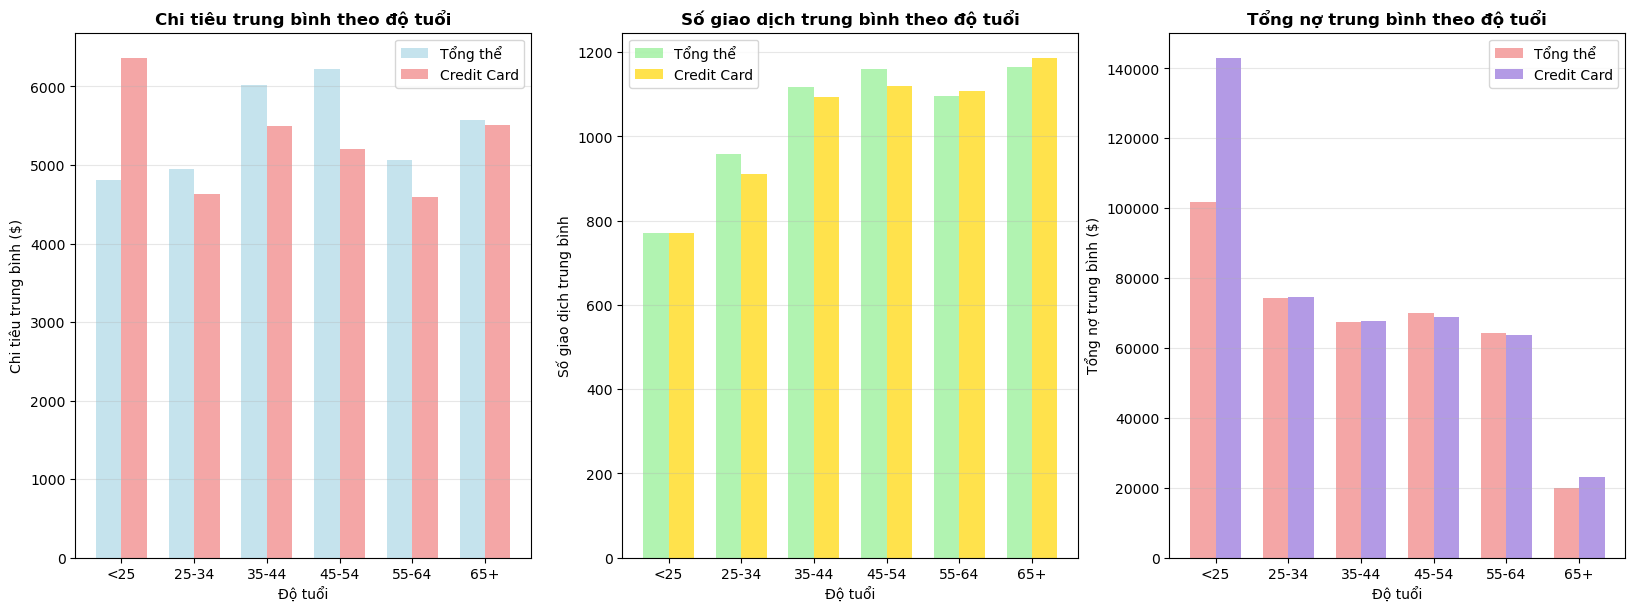

In [183]:
# 3. SO SÁNH CHI TIÊU VÀ GIAO DỊCH THEO ĐỘ TUỔI
plt.figure(figsize=(20, 15))

# Chi tiêu trung bình theo độ tuổi
plt.subplot(2, 3, 1)
age_spent_all = final_client_df.groupby('age_group')['total_spent'].mean()
age_spent_credit = credit_card_users.groupby('age_group')['total_spent'].mean()

x = np.arange(len(age_spent_all.index))
width = 0.35

plt.bar(x - width/2, age_spent_all.values, width, label='Tổng thể', alpha=0.7, color='lightblue')
plt.bar(x + width/2, age_spent_credit.values, width, label='Credit Card', alpha=0.7, color='lightcoral')
plt.title('Chi tiêu trung bình theo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Chi tiêu trung bình ($)')
plt.xticks(x, age_spent_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Số giao dịch trung bình theo độ tuổi
plt.subplot(2, 3, 2)
age_trans_all = final_client_df.groupby('age_group')['total_transactions'].mean()
age_trans_credit = credit_card_users.groupby('age_group')['total_transactions'].mean()

plt.bar(x - width/2, age_trans_all.values, width, label='Tổng thể', alpha=0.7, color='lightgreen')
plt.bar(x + width/2, age_trans_credit.values, width, label='Credit Card', alpha=0.7, color='gold')
plt.title('Số giao dịch trung bình theo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Số giao dịch trung bình')
plt.xticks(x, age_trans_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)


# Tổng nợ trung bình theo độ tuổi
plt.subplot(2, 3, 3)  # Vị trí mới
age_debt_all = final_client_df.groupby('age_group')['total_debt'].mean()
age_debt_credit = credit_card_users.groupby('age_group')['total_debt'].mean()

plt.bar(x - width/2, age_debt_all.values, width, label='Tổng thể', alpha=0.7, color='lightcoral')
plt.bar(x + width/2, age_debt_credit.values, width, label='Credit Card', alpha=0.7, color='mediumpurple')
plt.title('Tổng nợ trung bình theo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tổng nợ trung bình ($)')
plt.xticks(x, age_debt_all.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

Điểm tín dụng ở mọi mức điểm đều ở tỷ lệ cân bằng so với tổng thể, đánh giá ít rủi ro


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/1800272309.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_users['credit_score_group'] = credit_card_users['credit_score'].apply(categorize_credit_score)
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/1800272309.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_users['dti_ratio'] = credit_card_users['total_debt'] / credit_card_users['yearly_income']
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/

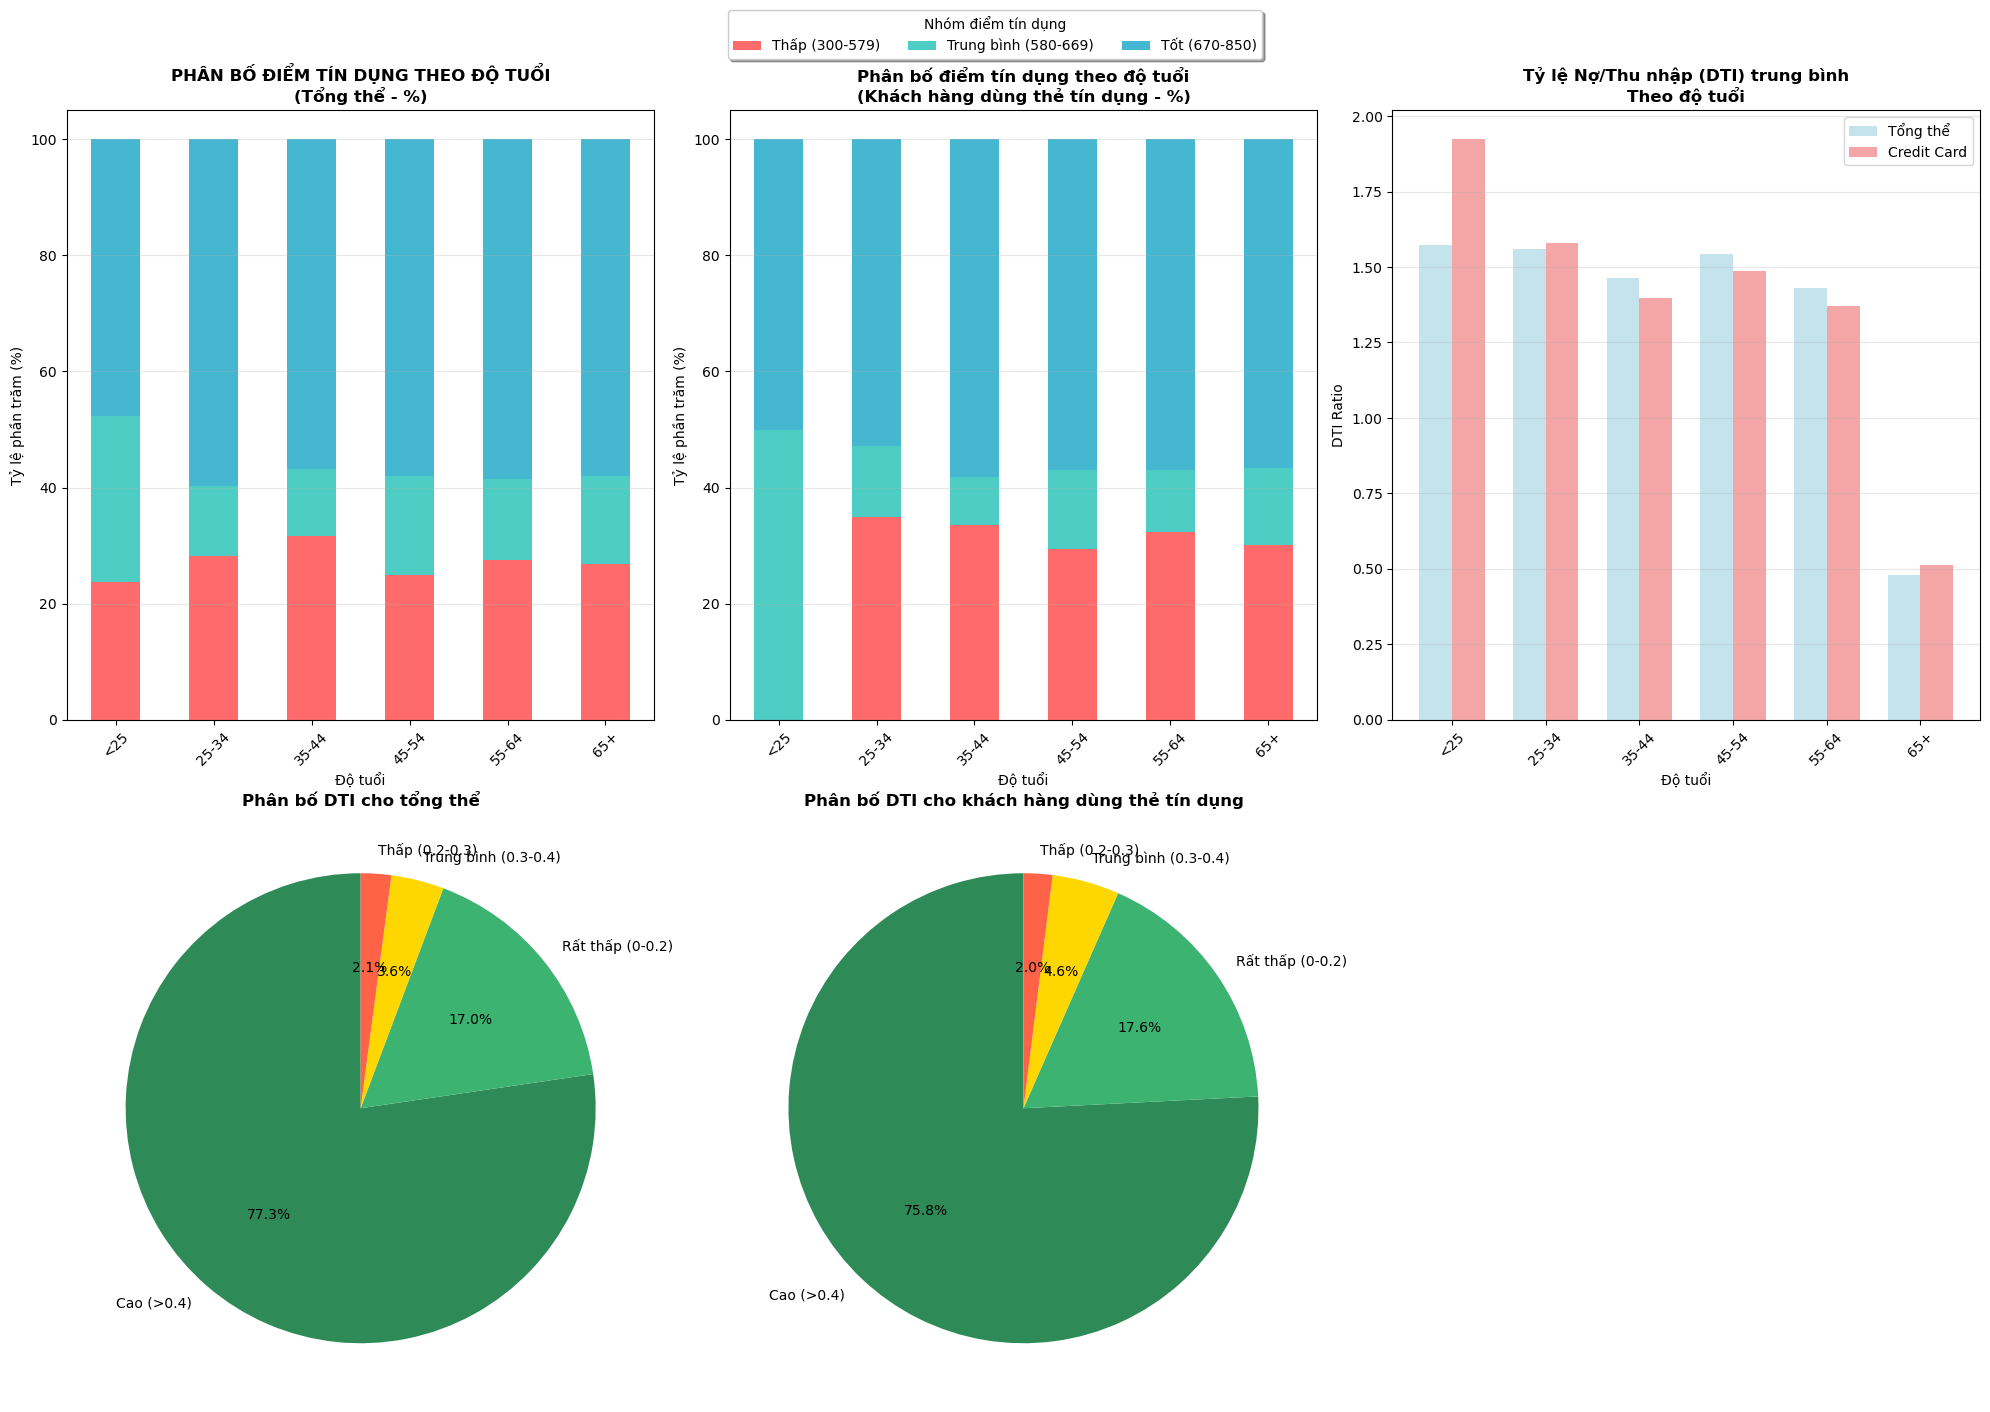

In [182]:
print('Điểm tín dụng ở mọi mức điểm đều ở tỷ lệ cân bằng so với tổng thể, đánh giá ít rủi ro')

# Tạo nhóm điểm tín dụng
def categorize_credit_score(score):
    if score >= 750:
        return 'Cao (750+)'
    elif score >= 650:
        return 'Trung bình (650-749)'
    else:
        return 'Thấp (<650)'

# Áp dụng cho cả hai dataset
final_client_df['credit_score_group'] = final_client_df['credit_score'].apply(categorize_credit_score)
credit_card_users['credit_score_group'] = credit_card_users['credit_score'].apply(categorize_credit_score)
# === TÍNH TOÁN TỶ LỆ NỢ/THU NHẬP (DTI) ===

final_client_df['dti_ratio'] = final_client_df['total_debt'] / final_client_df['yearly_income']
credit_card_users['dti_ratio'] = credit_card_users['total_debt'] / credit_card_users['yearly_income']

# SO SÁNH PHÂN BỐ ĐIỂM TÍN DỤNG VÀ DTI
plt.figure(figsize=(20, 15))

# Định nghĩa màu sắc
credit_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
credit_labels = ['Thấp (<650)', 'Trung bình (650-749)', 'Cao (750+)']

dti_colors = ['#2E8B57', '#3CB371', '#FFD700', '#FF6347', '#D3D3D3']
dti_labels = ['Rất thấp (0-0.2)', 'Thấp (0.2-0.36)', 'Trung bình (0.36-0.5)', 'Cao (>0.5)', 'Không xác định']

# Phân bố điểm tín dụng theo độ tuổi - Tổng thể
plt.subplot(2, 3, 1)
credit_age_all = pd.crosstab(final_client_df['age_group'], final_client_df['credit_score_group'])
credit_age_all_percent = credit_age_all.div(credit_age_all.sum(axis=1), axis=0) * 100
credit_age_all_percent.plot(kind='bar', stacked=True, ax=plt.gca(), color=credit_colors, legend=False)
plt.title('PHÂN BỐ ĐIỂM TÍN DỤNG THEO ĐỘ TUỔI\n(Tổng thể - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Phân bố điểm tín dụng theo độ tuổi - Credit Card
plt.subplot(2, 3, 2)
credit_age_credit = pd.crosstab(credit_card_users['age_group'], credit_card_users['credit_score_group'])
credit_age_credit_percent = credit_age_credit.div(credit_age_credit.sum(axis=1), axis=0) * 100
credit_age_credit_percent.plot(kind='bar', stacked=True, ax=plt.gca(), color=credit_colors, legend=False)
plt.title('Phân bố điểm tín dụng theo độ tuổi\n(Khách hàng dùng thẻ tín dụng - %)', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ phần trăm (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.figlegend(handles=[plt.Rectangle((0,0),1,1, fc=color) for color in colors],
            labels=legend_labels,
            title='Nhóm điểm tín dụng',
            loc='upper center',
            bbox_to_anchor=(0.5, 0.95),
            ncol=3,
            fontsize=10,
            frameon=True,
            fancybox=True,
            shadow=True)

# DTI theo độ tuổi
plt.subplot(2, 3, 3)
age_dti_all = final_client_df.groupby('age_group')['dti_ratio'].mean()
age_dti_credit = credit_card_users.groupby('age_group')['dti_ratio'].mean()

x = np.arange(len(age_dti_all.index))
width = 0.35

plt.bar(x - width/2, age_dti_all.values, width, label='Tổng thể', alpha=0.7, color='lightblue')
plt.bar(x + width/2, age_dti_credit.values, width, label='Credit Card', alpha=0.7, color='lightcoral')
plt.title('Tỷ lệ Nợ/Thu nhập (DTI) trung bình\nTheo độ tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('DTI Ratio')
plt.xticks(x, age_dti_all.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Phân nhóm DTI
def categorize_dti(dti):
    if dti <= 0.2:
        return 'Rất thấp (0-0.2)'
    elif dti <= 0.3:
        return 'Thấp (0.2-0.3)'
    elif dti <= 0.4:
        return 'Trung bình (0.3-0.4)'
    else:
        return 'Cao (>0.4)'

final_client_df['dti_group'] = final_client_df['dti_ratio'].apply(categorize_dti)
credit_card_users['dti_group'] = credit_card_users['dti_ratio'].apply(categorize_dti)

dti_all = final_client_df['dti_group'].value_counts(normalize=True) * 100
dti_credit = credit_card_users['dti_group'].value_counts(normalize=True) * 100

# Pie chart cho tổng thể
plt.subplot(2, 3, 4)
plt.pie(dti_all.values, labels=dti_all.index, autopct='%1.1f%%', startangle=90, 
        colors=dti_colors[:len(dti_all)])
plt.title('Phân bố DTI cho tổng thể', fontsize=12, fontweight='bold')

# Pie chart cho credit card
plt.subplot(2, 3, 5)
plt.pie(dti_credit.values, labels=dti_credit.index, autopct='%1.1f%%', startangle=90,
        colors=dti_colors[:len(dti_credit)])
plt.title('Phân bố DTI cho khách hàng dùng thẻ tín dụng', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.92])  
plt.show()

Nhóm khách hàng có tỷ lệ DTI cao chủ yếu có mức thu nhập dưới 50k $ và có tổng nợ hơn 50k $

2. PHÂN TÍCH THEO TỔNG NỢ:
Thống kê tổng nợ - Nhóm DTI cao vs Tổng thể:
  - Nợ trung bình: $72,801 (DTI cao) vs $57,530 (Tổng thể)
  - Nợ trung vị: $64,073 (DTI cao) vs $51,667 (Tổng thể)


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3447394347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_dti_clients['income_group'] = final_client_df['group_income']
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3447394347.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_dti_clients['debt_group'] = pd.cut(high_dti_clients['total_debt'], bins=debt_bins, labels=debt_labels)


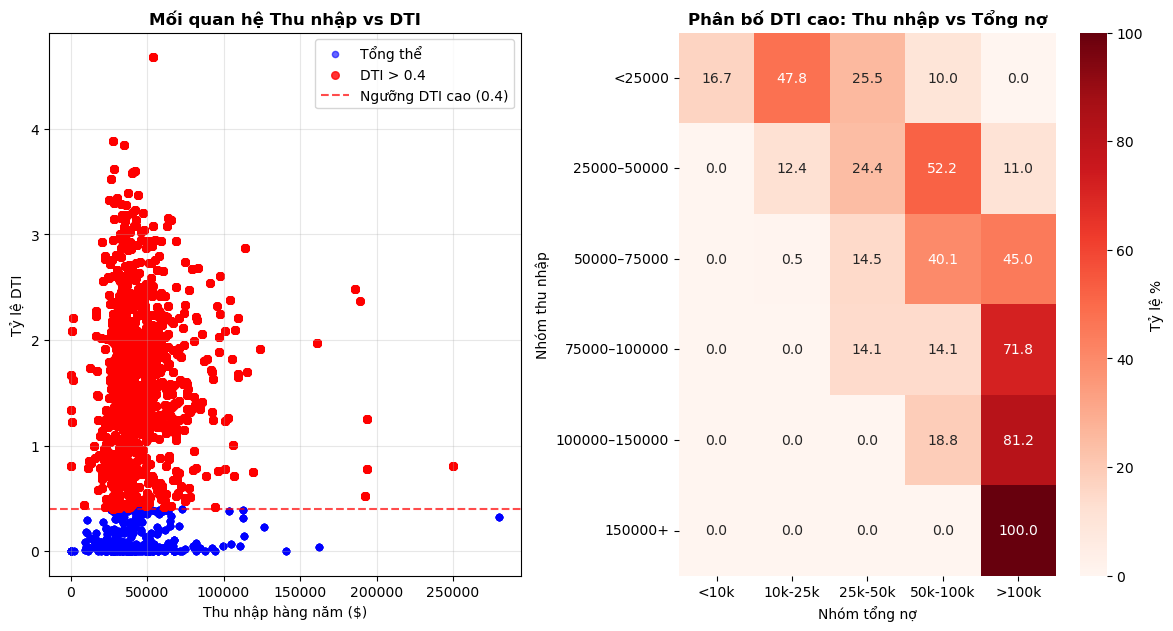

In [184]:
# Tại sao DTI cao chiếm hơn 70%
print("Nhóm khách hàng có tỷ lệ DTI cao chủ yếu có mức thu nhập dưới 50k $ và có tổng nợ hơn 50k $")
# Lọc nhóm DTI cao
high_dti_clients = final_client_df[final_client_df['dti_ratio'] > 0.4]

# Phân nhóm thu nhập cho DTI cao

high_dti_clients['income_group'] = final_client_df['group_income']
income_dist_high_dti = high_dti_clients['income_group'].value_counts(normalize=True) * 100

# Phân tích nợ của nhóm DTI cao
print("\n2. PHÂN TÍCH THEO TỔNG NỢ:")
debt_stats_high_dti = high_dti_clients['total_debt'].describe()
debt_stats_all = final_client_df['total_debt'].describe()

print("Thống kê tổng nợ - Nhóm DTI cao vs Tổng thể:")
print(f"  - Nợ trung bình: ${debt_stats_high_dti['mean']:,.0f} (DTI cao) vs ${debt_stats_all['mean']:,.0f} (Tổng thể)")
print(f"  - Nợ trung vị: ${debt_stats_high_dti['50%']:,.0f} (DTI cao) vs ${debt_stats_all['50%']:,.0f} (Tổng thể)")

# Phân nhóm nợ
debt_bins = [0, 10000, 25000, 50000, 100000, float('inf')]
debt_labels = ['<10k', '10k-25k', '25k-50k', '50k-100k', '>100k']

high_dti_clients['debt_group'] = pd.cut(high_dti_clients['total_debt'], bins=debt_bins, labels=debt_labels)
debt_dist_high_dti = high_dti_clients['debt_group'].value_counts(normalize=True) * 100

# TẠO BIỂU ĐỒ CHỨNG MINH
plt.figure(figsize=(18, 12))

# Mối quan hệ Thu nhập vs DTI
plt.subplot(2, 3, 1)
plt.scatter(final_client_df['yearly_income'], final_client_df['dti_ratio'], 
           alpha=0.6, color='blue', label='Tổng thể', s=20)
plt.scatter(high_dti_clients['yearly_income'], high_dti_clients['dti_ratio'], 
           alpha=0.8, color='red', label='DTI > 0.4', s=30)
plt.axhline(y=0.4, color='red', linestyle='--', alpha=0.7, label='Ngưỡng DTI cao (0.4)')
plt.title('Mối quan hệ Thu nhập vs DTI', fontsize=12, fontweight='bold')
plt.xlabel('Thu nhập hàng năm ($)')
plt.ylabel('Tỷ lệ DTI')
plt.legend()
plt.grid(True, alpha=0.3)

# Heatmap Thu nhập vs Tổng nợ cho DTI cao
plt.subplot(2, 3, 2)
heatmap_data = pd.crosstab(high_dti_clients['income_group'], 
                          high_dti_clients['debt_group'], 
                          normalize='index') * 100
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', cbar_kws={'label': 'Tỷ lệ %'})
plt.title('Phân bố DTI cao: Thu nhập vs Tổng nợ', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm tổng nợ')
plt.ylabel('Nhóm thu nhập')

plt.tight_layout()
plt.show()

# Tính tỷ lệ khách hàng có thu nhập thấp (<50k) trong nhóm DTI cao
low_income_high_dti = len(high_dti_clients[high_dti_clients['yearly_income'] < 50000])
low_income_rate = low_income_high_dti / len(high_dti_clients) * 100

# Tính tỷ lệ khách hàng có nợ cao (>25k) trong nhóm DTI cao
high_debt_high_dti = len(high_dti_clients[high_dti_clients['total_debt'] > 25000])
high_debt_rate = high_debt_high_dti / len(high_dti_clients) * 100


Số lượng khách hàng dùng credit card: 4,893
Tỷ lệ: 41.1% tổng số khách hàng
Tỷ lệ sử dụng Credit card để chi tiêu cho du lịch cao hơn so với tổng thể gần 4%


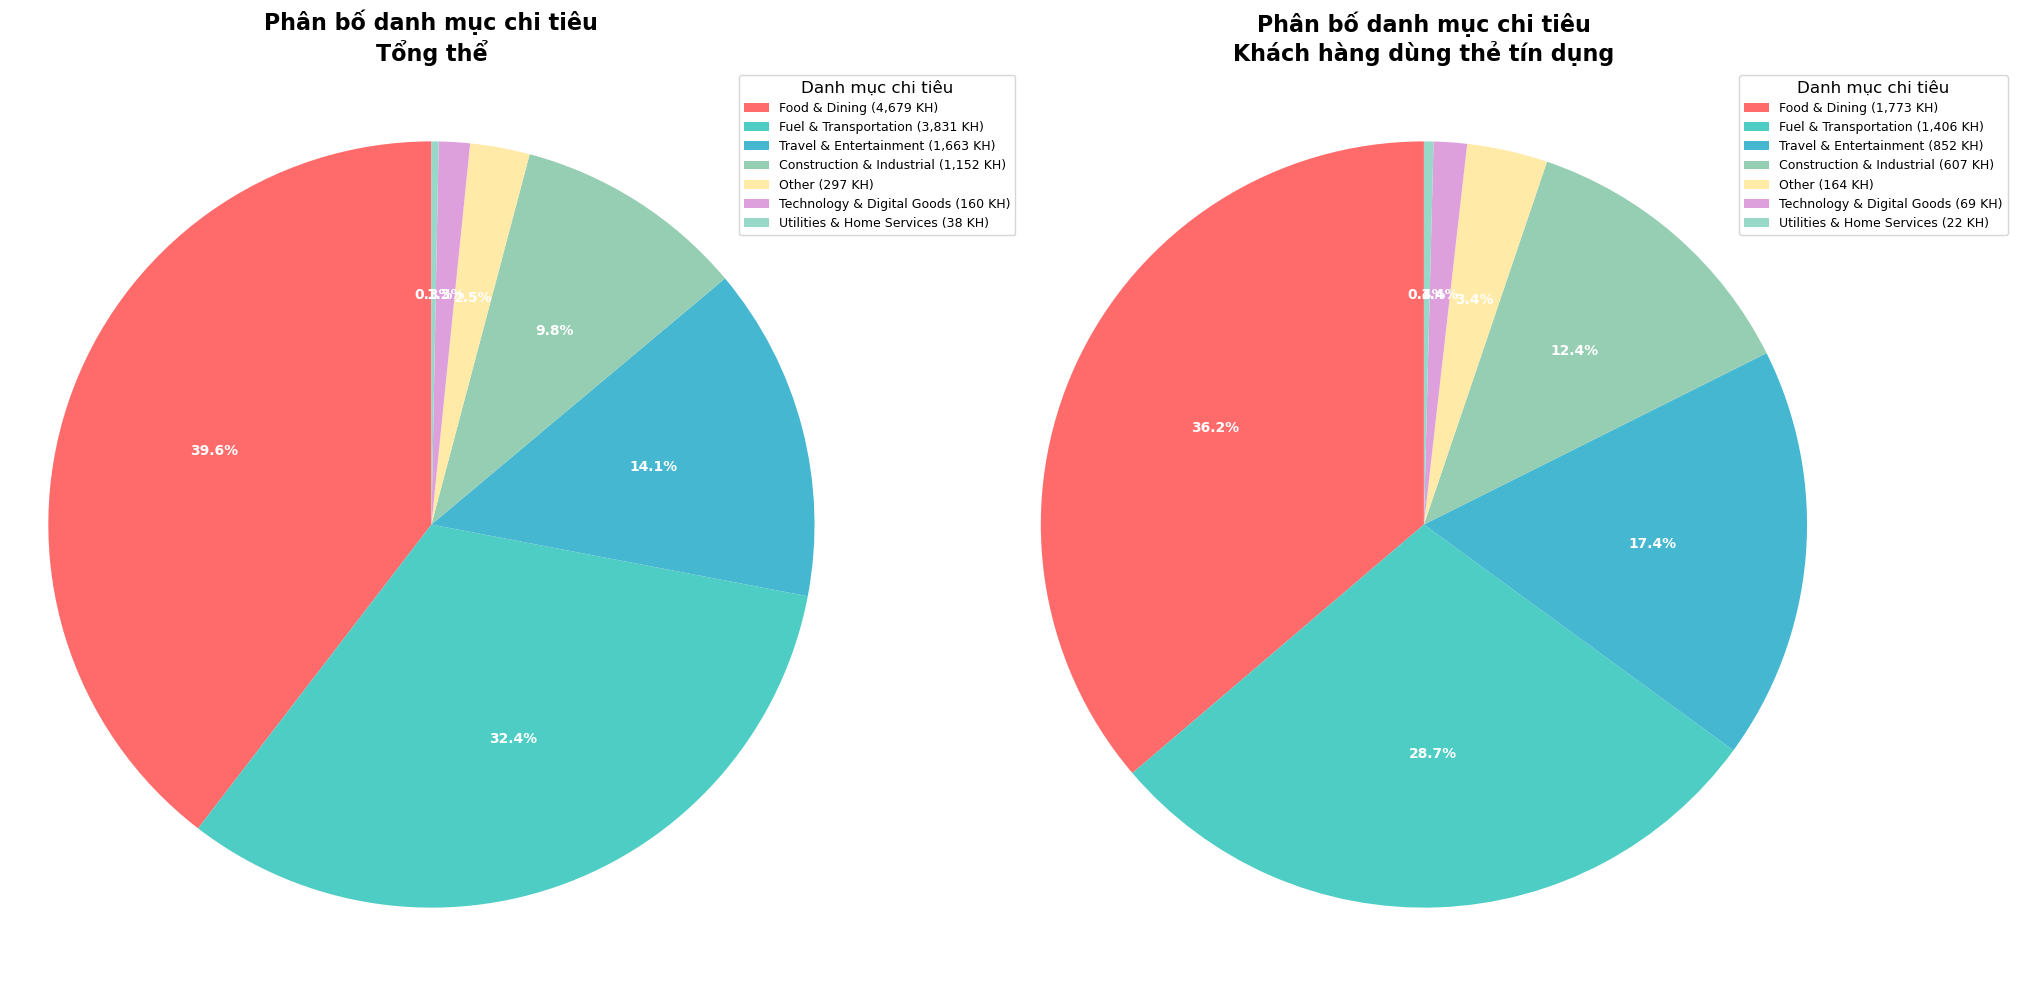

In [185]:
print(f"Số lượng khách hàng dùng credit card: {len(credit_card_users):,}")
print(f"Tỷ lệ: {len(credit_card_users)/len(final_client_df)*100:.1f}% tổng số khách hàng")
print('Tỷ lệ sử dụng Credit card để chi tiêu cho du lịch cao hơn so với tổng thể gần 4%') 

# SO SÁNH PHÂN BỐ DANH MỤC CHI TIÊU - TỔNG THỂ vs CREDIT CARD
plt.figure(figsize=(20, 10))

# Tính toán phần trăm cho cả hai nhóm
category_counts_all = final_client_df['top_category'].value_counts()
category_percent_all = (category_counts_all / len(final_client_df) * 100).round(1)

category_counts_credit = credit_card_users['top_category'].value_counts()
category_percent_credit = (category_counts_credit / len(credit_card_users) * 100).round(1)

# Tạo màu sắc thống nhất cho cả hai pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

# Pie Chart 1: Tổng thể
plt.subplot(1, 2, 1)
wedges1, texts1, autotexts1 = plt.pie(category_percent_all.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts1:
    autotext.set_color('white')

# Tạo chú thích
legend_labels1 = [f'{category} ({count:,} KH)' for category, count in category_counts_all.items()]
plt.legend(wedges1, legend_labels1, 
           title="Danh mục chi tiêu",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('Phân bố danh mục chi tiêu\nTổng thể', fontsize=16, fontweight='bold')
plt.axis('equal')

# Pie Chart 2: Credit Card Users
plt.subplot(1, 2, 2)
wedges2, texts2, autotexts2 = plt.pie(category_percent_credit.values, 
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      textprops={'fontsize': 10, 'fontweight': 'bold'})

# Làm đẹp phần trăm bên trong
for autotext in autotexts2:
    autotext.set_color('white')

# Tạo chú thích
legend_labels2 = [f'{category} ({count:,} KH)' for category, count in category_counts_credit.items()]
plt.legend(wedges2, legend_labels2, 
           title="Danh mục chi tiêu",
           title_fontsize=12,
           loc="upper right",
           bbox_to_anchor=(1.2, 1.0),
           fontsize=9)

plt.title('Phân bố danh mục chi tiêu\nKhách hàng dùng thẻ tín dụng', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

Có thể thấy, nhóm tuổi 35-54 có mức chi tiêu cho Du lịch và Giải trí tương đương với các nhóm tuổi khác, tuy nhiên, chi tiêu cho Ăn uống cũng như Xăng dầu & Di chuyển lại ở mức cao. Có khả năng chi tiêu, có thể áp dụng gói dịch vụ cho vay đi Du lịch, giúp kích thích tăng trưởng chi tiêu cho sản phẩm liên quan đến Du lịch & Giải trí
Top 3 mặt hàng chi tiêu nhiều nhất của khách hàng sử dụng thẻ tín dụng:
1. Food & Dining: 1,773 khách hàng (36.2%)
2. Fuel & Transportation: 1,406 khách hàng (28.7%)
3. Travel & Entertainment: 852 khách hàng (17.4%)




/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/2085439413.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_spent = top3_data.groupby(['age_group', 'top_category'])['total_spent'].mean().unstack()


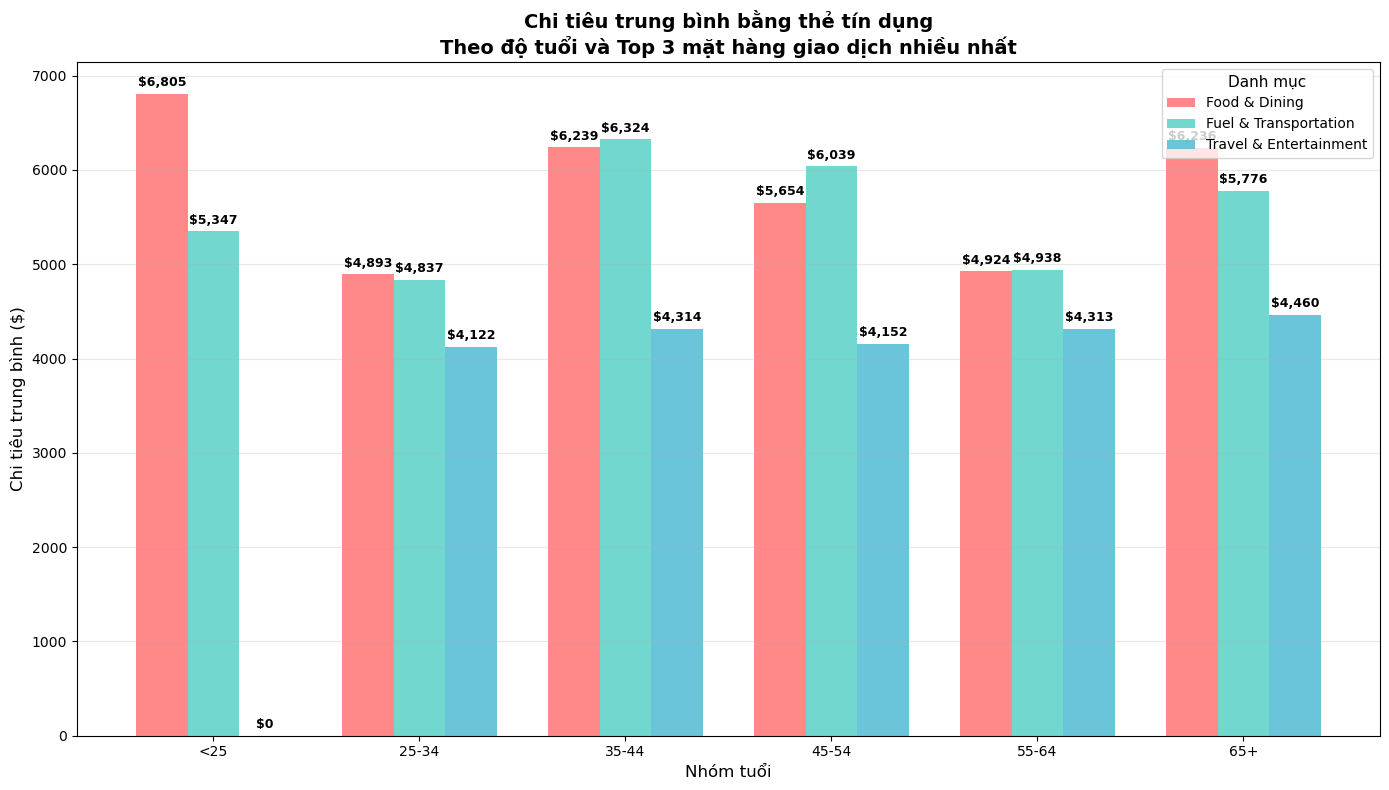

In [186]:
print('Có thể thấy, nhóm tuổi 35-54 có mức chi tiêu cho Du lịch và Giải trí tương đương với các nhóm tuổi khác, tuy nhiên, chi tiêu cho Ăn uống cũng như Xăng dầu & Di chuyển lại ở mức cao. Có khả năng chi tiêu, có thể áp dụng gói dịch vụ cho vay đi Du lịch, giúp kích thích tăng trưởng chi tiêu cho sản phẩm liên quan đến Du lịch & Giải trí')

# Tìm top 3 category lớn nhất trong credit card users
top3_categories = credit_card_users['top_category'].value_counts().head(3).index.tolist()
print(f"Top 3 mặt hàng chi tiêu nhiều nhất của khách hàng sử dụng thẻ tín dụng:")
for i, category in enumerate(top3_categories, 1):
    count = credit_card_users[credit_card_users['top_category'] == category].shape[0]
    percent = (count / len(credit_card_users)) * 100
    print(f"{i}. {category}: {count:,} khách hàng ({percent:.1f}%)")

print("\n")

# Lọc chỉ top 3 category
top3_data = credit_card_users[credit_card_users['top_category'].isin(top3_categories)]

# Tính chi tiêu trung bình theo độ tuổi và category
age_category_spent = top3_data.groupby(['age_group', 'top_category'])['total_spent'].mean().unstack()

# SỬA LỖI: Điền giá trị 0 cho các ô NaN
age_category_spent = age_category_spent.fillna(0)

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))

# Biểu đồ cột grouped
x = np.arange(len(age_category_spent.index))
width = 0.25

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, category in enumerate(top3_categories):
    plt.bar(x + i*width - width, age_category_spent[category], width, 
            label=category, color=colors[i], alpha=0.8)

plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Chi tiêu trung bình ($)', fontsize=12)
plt.title('Chi tiêu trung bình bằng thẻ tín dụng\nTheo độ tuổi và Top 3 mặt hàng giao dịch nhiều nhất', 
          fontsize=14, fontweight='bold')
plt.xticks(x, age_category_spent.index)
plt.legend(title='Danh mục', title_fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên các cột
for i, age_group in enumerate(age_category_spent.index):
    for j, category in enumerate(top3_categories):
        value = age_category_spent.loc[age_group, category]
        plt.text(i + j*width - width, value + 50, f'${value:,.0f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [187]:
# Tạo các chỉ số đánh giá
client_analysis = final_client_df.copy()

# Tính tỷ lệ hạn mức tín dụng so với thu nhập (ước tính)
# Chuyển yearly_income về dạng số để tính toán
income_mapping = {
    '<25000': 12500,
    '25000–50000': 37500,
    '50000–75000': 62500,
    '75000–100000': 87500,
    '100000–150000': 125000,
    '150000+': 175000
}

client_analysis['income_numeric'] = client_analysis['group_income'].astype(str).map(income_mapping)
client_analysis['credit_limit_income_ratio'] = client_analysis['credit_limit'] / client_analysis['income_numeric']

# Tính tỷ lệ sử dụng credit_limit (ước tính từ chi tiêu)
client_analysis['credit_utilization_ratio'] = (client_analysis['total_spent'] / client_analysis['credit_limit']).clip(upper=1)  # Giới hạn max 100%

# Phân loại khách hàng theo độ tuổi mục tiêu (35-55)
client_analysis['is_target_age'] = client_analysis['age_group'].isin(['35-44', '45-54'])

print(f"\nSố khách hàng trong nhóm mục tiêu (35-54 tuổi): {client_analysis['is_target_age'].sum():,}")
print(f"Tỷ lệ: {client_analysis['is_target_age'].mean()*100:.1f}% tổng số khách hàng")


Số khách hàng trong nhóm mục tiêu (35-54 tuổi): 5,543
Tỷ lệ: 46.6% tổng số khách hàng


/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3749105932.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_by_age = client_analysis.groupby('age_group')['credit_limit_income_ratio'].mean()
/var/folders/yn/_2zvscq166x5wjwknksc11bw0000gn/T/ipykernel_1471/3749105932.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilization_by_age = client_analysis.groupby('age_group')['credit_utilization_ratio'].mean()


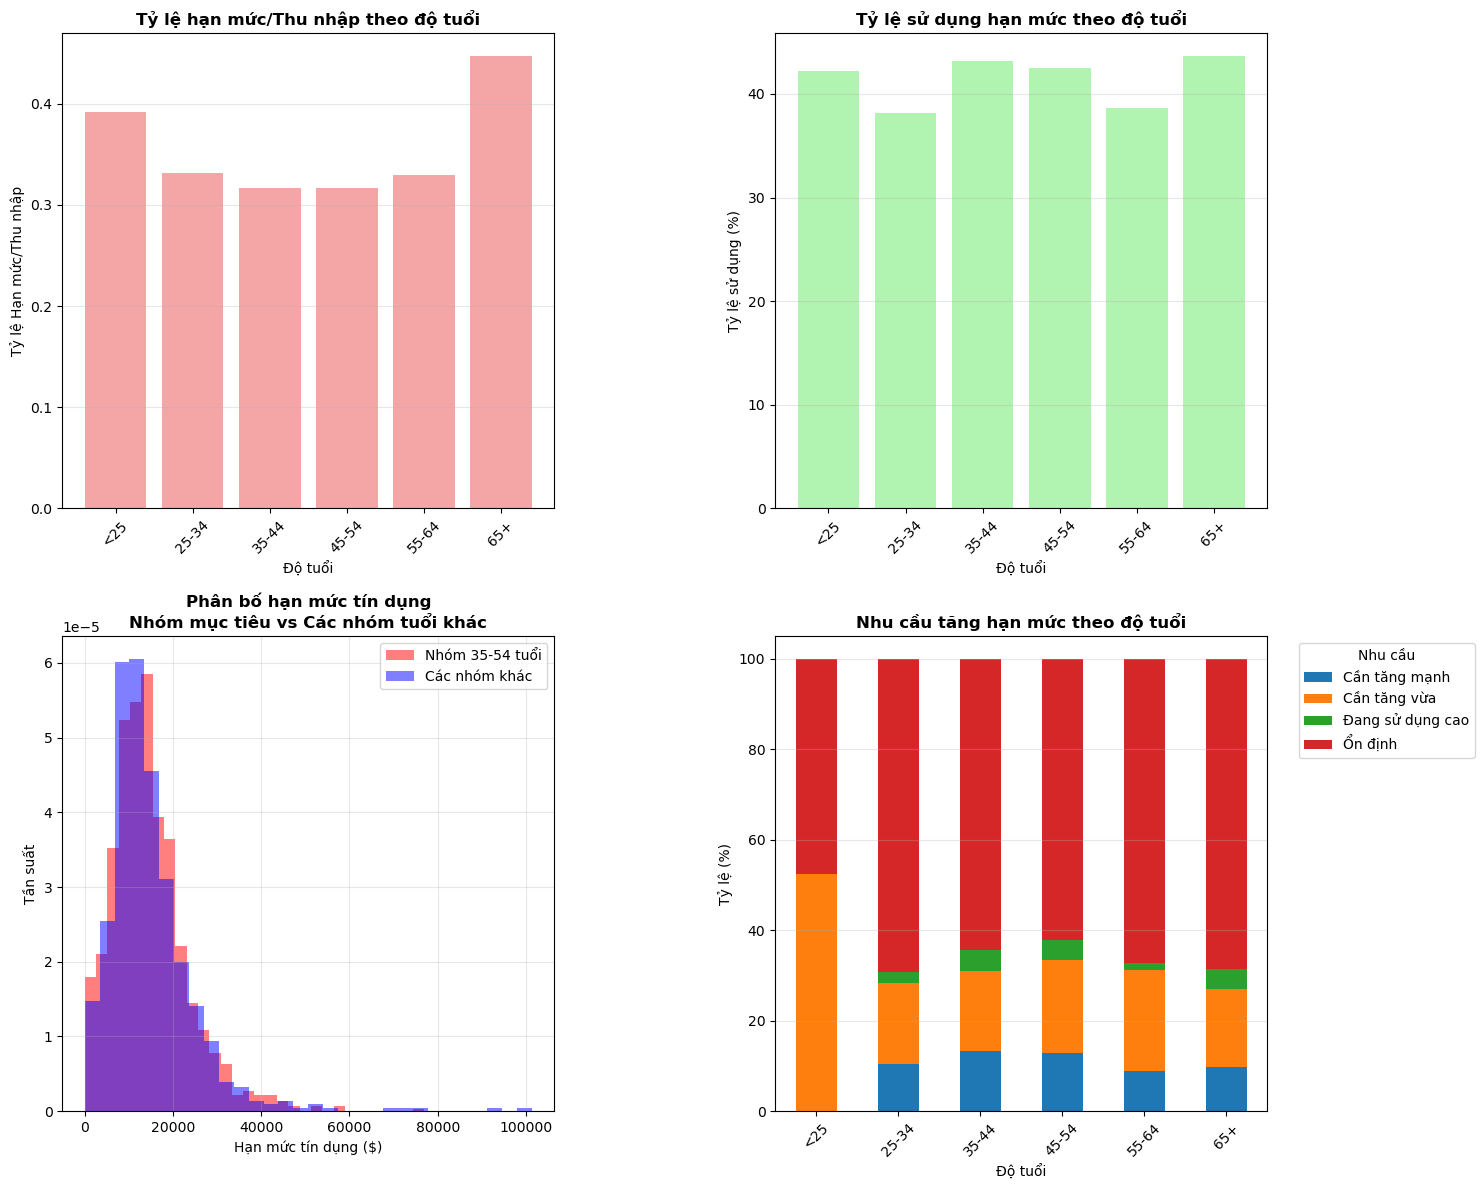

Các dẫn chứng cho thấy nhóm tuổi 35-54 đang là nhóm tuổi có hạn mức thấp nhất so với thu nhập tiềm năng của họ, tuy nhiên vậy, tỷ lệ sử dụng hạn mức đang ở mức khá tốt, cao nhất trong mọi nhóm tuổi. Nhìn vào nhu cầu tăng trưởng hạn mức, nhóm tuổi 35-54 đang là 1 trong 2 nhóm có tỷ lệ cần tăng mạnh lớn nhất ở các nhóm tuổi


In [188]:
# Hạn mức theo độ tuổi và thu nhập
plt.figure(figsize=(20, 12))

# Tỷ lệ Han mức/Thu nhập theo độ tuổi
plt.subplot(2, 3, 1)
ratio_by_age = client_analysis.groupby('age_group')['credit_limit_income_ratio'].mean()
plt.bar(ratio_by_age.index, ratio_by_age.values, color='lightcoral', alpha=0.7)
plt.title('Tỷ lệ hạn mức/Thu nhập theo độ tuổi', fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ Hạn mức/Thu nhập')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Biểu đồ 2: Tỷ lệ sử dụng credit limit theo độ tuổi
plt.subplot(2, 3, 2)
utilization_by_age = client_analysis.groupby('age_group')['credit_utilization_ratio'].mean()
plt.bar(utilization_by_age.index, utilization_by_age.values * 100, color='lightgreen', alpha=0.7)
plt.title('Tỷ lệ sử dụng hạn mức theo độ tuổi', fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ sử dụng (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Biểu đồ 3: Phân bố credit limit cho nhóm mục tiêu vs các nhóm khác
plt.subplot(2, 3, 4)
target_group = client_analysis[client_analysis['is_target_age']]['credit_limit']
other_group = client_analysis[~client_analysis['is_target_age']]['credit_limit']

plt.hist(target_group, bins=30, alpha=0.5, label='Nhóm 35-54 tuổi', color='red', density=True)
plt.hist(other_group, bins=30, alpha=0.5, label='Các nhóm khác', color='blue', density=True)
plt.title('Phân bố hạn mức tín dụng\nNhóm mục tiêu vs Các nhóm tuổi khác', fontweight='bold')
plt.xlabel('Hạn mức tín dụng ($)')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(alpha=0.3)

# Biểu đồ 4: Tỷ lệ khách hàng có credit_limit thấp so với thu nhập
def identify_need_credit_increase(row):
    """Xác định khách hàng cần tăng credit limit"""
    if row['credit_limit_income_ratio'] < 0.15:  # Credit limit < 10% thu nhập
        return 'Cần tăng mạnh'
    elif row['credit_limit_income_ratio'] < 0.25:  # Credit limit < 20% thu nhập
        return 'Cần tăng vừa'
    elif row['credit_utilization_ratio'] > 0.8:  # Sử dụng > 80% credit limit
        return 'Đang sử dụng cao'
    else:
        return 'Ổn định'

client_analysis['credit_need'] = client_analysis.apply(identify_need_credit_increase, axis=1)

plt.subplot(2, 3, 5)
credit_need_by_age = pd.crosstab(client_analysis['age_group'], client_analysis['credit_need'], normalize='index') * 100
credit_need_by_age.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Nhu cầu tăng hạn mức theo độ tuổi', fontweight='bold')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Nhu cầu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('Các dẫn chứng cho thấy nhóm tuổi 35-54 đang là nhóm tuổi có hạn mức thấp nhất so với thu nhập tiềm năng của họ, tuy nhiên vậy, tỷ lệ sử dụng hạn mức đang ở mức khá tốt, cao nhất trong mọi nhóm tuổi. Nhìn vào nhu cầu tăng trưởng hạn mức, nhóm tuổi 35-54 đang là 1 trong 2 nhóm có tỷ lệ cần tăng mạnh lớn nhất ở các nhóm tuổi')


Tổng số khách hàng nhóm 35-54: 5,543
Hạn mức tín dụng trung bình: $14,616
Thu nhập trung bình (ước tính): $47,030
Tỷ lệ Hạn mức tín dụng/Thu nhập trung bình: 0.32
Tỷ lệ sử dụng hạn mức trung bình: 42.8%
Nhóm tuổi 35-54 có tình trạng để trống hạn mức khi tỷ lệ sử dụng hạn mức là tương đối thấp ở mức hạn mức cao, hầu hết những người có tỷ lệ sử dụng tín dụng cao đều có mức giới hạn tín dụng thấp. Trong khi đó hạn mức tín dụng/thu nhập chủ yếu tập trung ở mức 0.2 - 0.3 (an toàn cao). Điểm tín dụng chủ yếu >650 nhưng lại ở hạn mức thấp. Các yếu tố đó chỉ ra rằng nhóm tuổi 35-54 có tiềm năng tăng trưởng tỷ lệ sử dụng tín dụng, phù hợp áp dụng các ưu đãi và chính sách tăng hạn mức ở nhóm đối tượng này


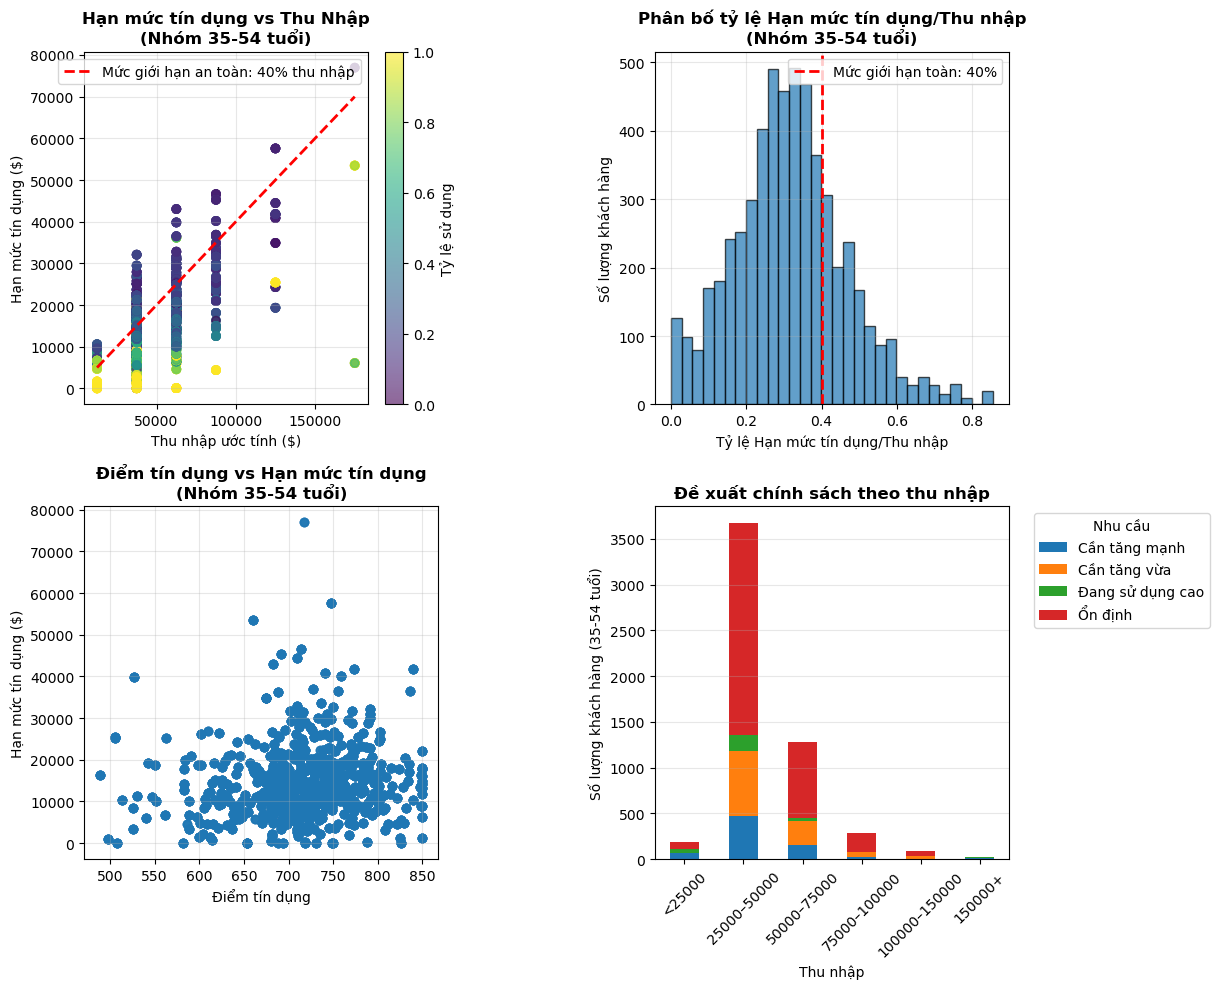

In [189]:
# Phân tích hạn mức nhóm mục tiêu 35-55 tuổi
target_customers = client_analysis[client_analysis['is_target_age']].copy()

# Thống kê cơ bản
print(f"Tổng số khách hàng nhóm 35-54: {len(target_customers):,}")
print(f"Hạn mức tín dụng trung bình: ${target_customers['credit_limit'].mean():,.0f}")
print(f"Thu nhập trung bình (ước tính): ${target_customers['income_numeric'].mean():,.0f}")
print(f"Tỷ lệ Hạn mức tín dụng/Thu nhập trung bình: {target_customers['credit_limit_income_ratio'].mean():.2f}")
print(f"Tỷ lệ sử dụng hạn mức trung bình: {target_customers['credit_utilization_ratio'].mean()*100:.1f}%")
print(
    "Nhóm tuổi 35-54 có tình trạng để trống hạn mức khi tỷ lệ sử dụng hạn mức là tương đối thấp ở mức hạn mức cao, hầu hết những người có tỷ lệ sử dụng tín dụng cao đều có mức giới hạn tín dụng thấp. Trong khi đó hạn mức tín dụng/thu nhập chủ yếu tập trung ở mức 0.2 - 0.3 (an toàn cao). Điểm tín dụng chủ yếu >650 nhưng lại ở hạn mức thấp. Các yếu tố đó chỉ ra rằng nhóm tuổi 35-54 có tiềm năng tăng trưởng tỷ lệ sử dụng tín dụng, phù hợp áp dụng các ưu đãi và chính sách tăng hạn mức ở nhóm đối tượng này"
)

# Phân tích theo thu nhập
plt.figure(figsize=(16, 10))

#  Scatter plot hạn mức vs Thu nhập 
plt.subplot(2, 3, 1)
plt.scatter(target_customers['income_numeric'], target_customers['credit_limit'], 
           alpha=0.6, c=target_customers['credit_utilization_ratio'], cmap='viridis')
plt.colorbar(label='Tỷ lệ sử dụng')
plt.xlabel('Thu nhập ước tính ($)')
plt.ylabel('Hạn mức tín dụng ($)')
plt.title('Hạn mức tín dụng vs Thu Nhập\n(Nhóm 35-54 tuổi)', fontweight='bold')
plt.grid(alpha=0.3)

# Vẽ đường chuẩn (credit limit = 40% thu nhập được coi là mức giới hạn an toàn ở châu Âu)
x_range = np.linspace(target_customers['income_numeric'].min(), target_customers['income_numeric'].max(), 100)
plt.plot(x_range, x_range * 0.40, 'r--', linewidth=2, label='Mức giới hạn an toàn: 40% thu nhập')
plt.legend()

# Phân bố tỷ lệ hạn mức/thu nhập
plt.subplot(2, 3, 2)
plt.hist(target_customers['credit_limit_income_ratio'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='Mức giới hạn toàn: 40%')
plt.xlabel('Tỷ lệ Hạn mức tín dụng/Thu nhập')
plt.ylabel('Số lượng khách hàng')
plt.title('Phân bố tỷ lệ Hạn mức tín dụng/Thu nhập\n(Nhóm 35-54 tuổi)', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Mối quan hệ giữa điểm tín dụng và hạn mức
plt.subplot(2, 3, 4)
plt.scatter(target_customers['credit_score'], target_customers['credit_limit'], alpha=0.6)
plt.xlabel('Điểm tín dụng')
plt.ylabel('Hạn mức tín dụng ($)')
plt.title('Điểm tín dụng vs Hạn mức tín dụng\n(Nhóm 35-54 tuổi)', fontweight='bold')
plt.grid(alpha=0.3)

# Đề xuất chính sách theo nhóm thu nhập
plt.subplot(2, 3, 5)
policy_by_income = pd.crosstab(target_customers['group_income'], target_customers['credit_need'])
policy_by_income.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Đề xuất chính sách theo thu nhập', fontweight='bold')
plt.xlabel('Thu nhập')
plt.ylabel('Số lượng khách hàng (35-54 tuổi)')
plt.legend(title='Nhu cầu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

